<a href="https://colab.research.google.com/github/gmp007/Machine-Learning-and-EDA-Exploratory-Data-Analysis-Projects/blob/main/Test/Final_Project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***
<strong> <center> 
<font size="+4"> ML Model to Predict Store Sale </font>

</center> 
</strong></p>

***

<img  style="float: center;  border:5px solid #ffb037;"  src="https://cdn.dribbble.com/users/6884444/screenshots/17368920/media/3bff2df5f4398f73c321dd959ec6bfed.jpg?compress=1&resize=1200x900&vertical=top">

This project explores dataset from a retail chain. 


## Problem Statement
- Demand Forecast is one of the key tasks in Supply Chain and Retail Domain in general. It is key in effective operation and optimization of retail supply chain. Effectively solving this problem requires knowledge about a wide range of tricks in Data Sciences and good understanding of ensemble techniques. 

- You are required to predict sales for each Store-Day level for one month. All the features will be provided and actual sales that happened during that month will also be provided for model evaluation. 


    
<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#ffb037;font-family:newtimeroman;color:##2243b6;font-size:150%;text-align:center;border-radius:8px 10px;">Overview of the project</p>   

## Key steps I have used are: 
    
### 1) Load Dataset 

### 2) DATA Visualization   

### 3) Data Preprocessing, Cleaning, and Creating
    
### 4) Model Building and Development with OLR and other Models - Training/Testing and Cross-Validation  

<b>DESCRIPTION</b>

Domain: Retail

<b>Dataset snapshot:</b> Training Data Description: Historic sales at Store-Day level for about two years for a retail giant, for more than 1000 stores. Also, other sale influencers like, whether on a particular day the store was fully open or closed for renovation, holiday and special event details, are also provided.


***

<b>Project Task: Week 1: </b>

<b>Exploratory Data Analysis (EDA) and Linear Regression: </b>

1. Transform the variables by using data manipulation techniques like, One-Hot Encoding 

2. Perform an EDA (Exploratory Data Analysis) to see the impact of variables over Sales.

3. Apply Linear Regression to predict the forecast and evaluate different accuracy metrices like RMSE (Root Mean Squared Error) and MAE(Mean Absolute Error) and determine which metric makes more sense. Can there be a better accuracy metric?


- Train a single model for all stores, using storeId as a feature.

- Train separate model for each store.

- Which performs better and Why? [In the first case, parameters are shared and not very free but not in second case]

- Try Ensemble of b) and c). What are the findings?

- Use Regularized Regression. It should perform better in an unseen test set. Any insights?

- Open-ended modeling to get possible predictions.


<b>Other Regression Techniques: </b>

4. When store is closed, sales = 0. Can this insight be used for Data Cleaning? Perform this and retrain the model. Any benefits of this step?

5. Use Non-Linear Regressors like Random Forest or other Tree-based Regressors.

- Train a single model for all stores, where storeId can be a feature.

- Train separate models for each store.

***Note:*** Dimensional Reduction techniques like, PCA and Tree’s Hyperparameter Tuning will be required. Cross-validate to find the best parameters. Infer the performance of both the models. 

6. Compare the performance of Linear Model and Non-Linear Model from the previous observations. Which performs better and why?

7. Train a Time-series model on the data taking time as the only feature. This will be a store-level training.

- Identify yearly trends and seasonal months


<b>Project Task: Week 2</b>

<b> Implementing Neural Networks: </b>


1. Train a LSTM on the same set of features and compare the result with traditional time-series model.

2. Comment on the behavior of all the models you have built so far

3. Cluster stores using sales and customer visits as features. Find out how many clusters or groups are possible. Also visualize the results.

4. Is it possible to have separate prediction models for each cluster? Compare results with the previous models.

<b> Applying ANN: </b>

5. Use ANN (Artificial Neural Network) to predict Store Sales.

- Fine-tune number of layers,

- Number of Neurons in each layers.

- Experiment in batch-size.

- Experiment with number of epochs. Carefully observe the loss and accuracy? What are the observations?

- Play with different  Learning Rate  variants of Gradient Descent like Adam, SGD, RMS-prop.

- Which activation performs best for this use case and why?

- Check how it performed in the dataset, calculate RMSE.

6. Use Dropout for ANN and find the optimum number of clusters (clusters formed considering the features: sales and customer visits). Compare model performance with traditional ML based prediction models. 

7. Find the best setting of neural net that minimizes the loss and can predict the sales best. Use techniques like Grid search, cross-validation and Random search.


In [ ]:
# Install nondefault libraries on Google Colab
#!pip install catboost
#!pip install pmdarima
#!pip install factor_analyzer

***
## Table of Contents
***

- [0 - Import Libraries and Load Data](#0)
- [1 - Data Preprocessing - Correcting, Completing, Creating, and Cleaning ](#1)
    - [1.1 - Feature Engineering and Obtaining Target](#1-1)
- [2 - Project Task One - EDA and Design of Regression ML Models](#2)
    - [2.1 - Exploratory Data Analysis and Data Visualization](#2-1)
    - [2.2 - Application of Ordinary Linear Regression Model](#2-2)
    - [2.3 - Factor Analysis and Principal Component Analysis](#2-3)
    - [2.4 - Other Regression Techniques - Beyond Ordinary Reg. Model (ORM) and Use of Cross-Validation](#2-3)
    - [2.5 - Design and Development of Time series Models](#2-4)
- [3 - Project Task Two - Design of Artificial Neural Networks](#3)
    - [3.1 - Design of LSTM ML Model](#3-1)
    - [3.2 - Design of CNN ML Model](#3-2)
- [4 - Summary and End of Case Study](#4)

In [ ]:
#General packages for data manipulation
import os
import time
import math
import random 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.tools as tls
from plotly.offline import init_notebook_mode, iplot 
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
import plotly.graph_objs as go
# Set notebook mode to work in offline
init_notebook_mode(connected=False)

%matplotlib inline 
from pylab import rcParams
rcParams['figure.figsize']=12,8
rcParams['axes.labelsize']=12
rcParams['xtick.labelsize']=12
rcParams['ytick.labelsize']=12

#display pandas dataframe columns 
#pd.options.display.max_columns = None

#ML model building and training
from sklearn.linear_model import LinearRegression,Ridge,ElasticNet,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,ExtraTreesRegressor
from xgboost import XGBRFRegressor,XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor,ExtraTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor,BayesianRidge,LassoLars,LassoLarsCV
from catboost import CatBoostRegressor
from sklearn.linear_model import ARDRegression
from sklearn import svm
from sklearn.model_selection import ShuffleSplit, cross_validate
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_score,cross_val_predict

from sklearn.decomposition import PCA, IncrementalPCA,TruncatedSVD
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
#from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA # New one 
from statsmodels.tsa.stattools import acf, pacf
import pmdarima as pm #Automatically determine the best ARIMA parameters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima.arima.utils import ndiffs

# For factor analysis
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo


from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from tensorflow import keras
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from tensorflow.keras.optimizers import Adam

#import the metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.metrics import mean_absolute_percentage_error,mean_squared_error


#import the required libraries for grid search
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

#Define a random seed
random_seed = 101
plotlyme =True

In [ ]:
timetotal = time.time() #Use this to compute the total time for the case study

# Load Datasets

In [ ]:
train = pd.read_csv("train_data.csv")
train.head()

Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          2  2015-06-30   5735        568     1      1            0   
1      2          2  2015-06-30   9863        877     1      1            0   
2      3          2  2015-06-30  13261       1072     1      1            0   
3      4          2  2015-06-30  13106       1488     1      1            0   
4      5          2  2015-06-30   6635        645     1      1            0   

   SchoolHoliday  
0              0  
1              0  
2              1  
3              0  
4              0

In [ ]:
test_val= pd.read_csv("test_data_hidden.csv")
test_val.head()

Store  DayOfWeek        Date  Sales  Customers  Open  Promo  StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1             0   
1      2          5  2015-07-31   6064        625     1      1             0   
2      3          5  2015-07-31   8314        821     1      1             0   
3      4          5  2015-07-31  13995       1498     1      1             0   
4      5          5  2015-07-31   4822        559     1      1             0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1

In [ ]:
test= pd.read_csv("test_data.csv")
test.head()

Store  DayOfWeek        Date  Customers  Open  Promo  StateHoliday  \
0      1          5  31-07-2015        555     1      1             0   
1      2          5  31-07-2015        625     1      1             0   
2      3          5  31-07-2015        821     1      1             0   
3      4          5  31-07-2015       1498     1      1             0   
4      5          5  31-07-2015        559     1      1             0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1

# Project Task One

### Exploratory Data Analysis (EDA) 

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982644 entries, 0 to 982643
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Store          982644 non-null  int64 
 1   DayOfWeek      982644 non-null  int64 
 2   Date           982644 non-null  object
 3   Sales          982644 non-null  int64 
 4   Customers      982644 non-null  int64 
 5   Open           982644 non-null  int64 
 6   Promo          982644 non-null  int64 
 7   StateHoliday   982644 non-null  object
 8   SchoolHoliday  982644 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 67.5+ MB


In [ ]:
train.isna().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [ ]:
test.isna().sum()

Store            0
DayOfWeek        0
Date             0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [ ]:
train.DayOfWeek.value_counts()

2    141204
1    140270
7    140270
6    140270
5    140270
4    140270
3    140090
Name: DayOfWeek, dtype: int64

In [ ]:
test.DayOfWeek.value_counts()

5    5575
4    5575
3    5575
2    4460
1    4460
7    4460
6    4460
Name: DayOfWeek, dtype: int64

In [ ]:
train.Open.value_counts()

1    814204
0    168440
Name: Open, dtype: int64

In [ ]:
test.Open.value_counts()

1    30188
0     4377
Name: Open, dtype: int64

In [ ]:
train.Promo.value_counts()

0    609059
1    373585
Name: Promo, dtype: int64

In [ ]:
test.Promo.value_counts()

0    20070
1    14495
Name: Promo, dtype: int64

In [ ]:
train.StateHoliday.unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [ ]:
test.StateHoliday.value_counts()

0    34565
Name: StateHoliday, dtype: int64

In [ ]:
train.SchoolHoliday.value_counts()

0    813700
1    168944
Name: SchoolHoliday, dtype: int64

In [ ]:
test.SchoolHoliday.value_counts()

0    21788
1    12777
Name: SchoolHoliday, dtype: int64

In [ ]:
test_val.sort_values(['Store'],inplace=True)
test.sort_values(['Store'],inplace=True)
df_all = train.append(test_val , ignore_index=True)
#print(df_all.shape)
df_all =df_all.append(test , ignore_index=True) # Note, test is not of the same order. So, some NaNs
print(df_all.shape)

(1051774, 9)


In [ ]:
df_all.isnull().sum()

Store                0
DayOfWeek            0
Date                 0
Sales            34565
Customers            0
Open                 0
Promo                0
StateHoliday         0
SchoolHoliday        0
dtype: int64

In [ ]:
df_all['year'] = pd.DatetimeIndex(df_all['Date']).year
df_all['month']=pd.DatetimeIndex(df_all['Date']).month 
df_all['day']=pd.DatetimeIndex(df_all['Date']).day

In [ ]:
df_all.year.unique()

array([2015, 2014, 2013])

In [ ]:
df_all['StateHoliday'].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [ ]:
# Let us do this directly using encoder later. It is more efficient
#df_all['year'] = df_all.year.replace({2013 : 0, 2014 : 1 , 2015 : 2 })
df_all['StateHoliday'] = df_all.StateHoliday.replace({'0' : 0, 'a' : 1 , 'b' : 2 ,'c' : 3}) # LabelEncoder doesn't work with mixed data types
df_all.head()

Store  DayOfWeek        Date    Sales  Customers  Open  Promo  \
0      1          2  2015-06-30   5735.0        568     1      1   
1      2          2  2015-06-30   9863.0        877     1      1   
2      3          2  2015-06-30  13261.0       1072     1      1   
3      4          2  2015-06-30  13106.0       1488     1      1   
4      5          2  2015-06-30   6635.0        645     1      1   

   StateHoliday  SchoolHoliday  year  month  day  
0             0              0  2015      6   30  
1             0              0  2015      6   30  
2             0              1  2015      6   30  
3             0              0  2015      6   30  
4             0              0  2015      6   30

In [ ]:
df_all.dtypes

Store              int64
DayOfWeek          int64
Date              object
Sales            float64
Customers          int64
Open               int64
Promo              int64
StateHoliday       int64
SchoolHoliday      int64
year               int64
month              int64
day                int64
dtype: object

In [ ]:
df_all.describe().T

count         mean          std     min     25%     50%  \
Store          1051774.0   558.415604   321.907477     1.0   280.0   558.0   
DayOfWeek      1051774.0     3.998395     1.994821     1.0     2.0     4.0   
Sales          1017209.0  5773.818972  3849.926175     0.0  3727.0  5744.0   
Customers      1051774.0   633.496971   463.484952     0.0   406.0   609.0   
Open           1051774.0     0.831528     0.374285     0.0     1.0     1.0   
Promo          1051774.0     0.382758     0.486060     0.0     0.0     0.0   
StateHoliday   1051774.0     0.043679     0.279072     0.0     0.0     0.0   
SchoolHoliday  1051774.0     0.184924     0.388236     0.0     0.0     0.0   
year           1051774.0  2013.870667     0.792352  2013.0  2013.0  2014.0   
month          1051774.0     5.878301     3.298813     1.0     3.0     6.0   
day            1051774.0    15.718918     8.777870     1.0     8.0    16.0   

                  75%      max  
Store           838.0   1115.0  
DayOfWeek         6.0      7.0  
Sales          7856.0  41551.0  
Customers       836.0   7388.0  
Open              1.0      1.0  
Promo             1.0      1.0  
StateHoliday      0.0      3.0  
SchoolHoliday     0.0      1.0  
year           2015.0   2015.0  
month             8.0     12.0  
day              23.0     31.0

In [ ]:
# Let's drop some variables that will not be needed
df_all.drop(['Date','Customers'],axis=1,inplace=True)
df_all_eachstore = df_all.copy() #Keep a copy for use later
df_all_eachstore_open = df_all.copy()
df_all_nostore_open = df_all.copy()
train_explore = df_all.iloc[:982644].reset_index(drop=True) # Keep a copy of the train without get_dummy

In [ ]:
# Perform encoding
columns_to_encode = ['DayOfWeek', 'Open', 'Promo','StateHoliday',
                     'SchoolHoliday', 'year','Store','day','month']
          

df_all= pd.get_dummies(df_all,columns=columns_to_encode,drop_first=True)
df_all.head()


Sales  DayOfWeek_2  DayOfWeek_3  DayOfWeek_4  DayOfWeek_5  DayOfWeek_6  \
0   5735.0            1            0            0            0            0   
1   9863.0            1            0            0            0            0   
2  13261.0            1            0            0            0            0   
3  13106.0            1            0            0            0            0   
4   6635.0            1            0            0            0            0   

   DayOfWeek_7  Open_1  Promo_1  StateHoliday_1  ...  month_3  month_4  \
0            0       1        1               0  ...        0        0   
1            0       1        1               0  ...        0        0   
2            0       1        1               0  ...        0        0   
3            0       1        1               0  ...        0        0   
4            0       1        1               0  ...        0        0   

   month_5  month_6  month_7  month_8  month_9  month_10  month_11  month_12  
0        0        1        0        0        0         0         0         0  
1        0        1        0        0        0         0         0         0  
2        0        1        0        0        0         0         0         0  
3        0        1        0        0        0         0         0         0  
4        0        1        0        0        0         0         0         0  

[5 rows x 1170 columns]

In [ ]:
# Separate the data to the original form
#df_all=concatenated_data
train_new = df_all.iloc[:982644].reset_index(drop=True)
test_val_new = df_all.iloc[982644:1017209].reset_index(drop=True)
test_new = df_all.iloc[1017209:].reset_index(drop=True)
print(train_new.shape,test_val_new.shape,test_new.shape)

(982644, 1170) (34565, 1170) (34565, 1170)


### Define some functions for future use

In [ ]:
# Define a function to undumpify after encoder => inverse-enconder
def undummify(df, prefix_sep="_"):
    cols2collapse = {
        item.split(prefix_sep)[0]: (prefix_sep in item) for item in df.columns
    }
    series_list = []
    for col, needs_to_collapse in cols2collapse.items():
        if needs_to_collapse:
            undummified = (
                df.filter(like=col)
                .idxmax(axis=1)
                .apply(lambda x: x.split(prefix_sep, maxsplit=1)[1])
                .rename(col)
            )
            series_list.append(undummified)
        else:
            series_list.append(df[col])
    undummified_df = pd.concat(series_list, axis=1)
    return undummified_df

In [ ]:
# Define a function to remove related columns
def removecolumns(df,colname=''):
  return df.drop(df.filter(regex=colname).columns, axis=1)

In [ ]:
# Define a function to keep related columns
def keepcolumns(df,colname=''):
  return df.filter(regex=colname)
  
#df3 = X_train.filter(regex='DayOfWeek')
#df3

In [ ]:
# Use label encoder to handle data for skewness plotting
# Perform Label Encoding
def labelencoding(df):
  encode = LabelEncoder() #Labelencoder is neater than one-shot encoder
  columns_to_encode = ['DayOfWeek', 'Open', 'Promo','StateHoliday', 
                     'SchoolHoliday', 'year','Store','day','month']
  for c in columns_to_encode:
    print(f"Label Encoding: {c} - {df[c].nunique()}")
    df[c] = encode.fit_transform(df[c])
  return df

### Perform Exploratory Data Analysis on the Training Dataset

In [ ]:
# Check variance for the training dataset later
x=train._get_numeric_data()
var_factor=pd.DataFrame()
var_factor["VIF"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
var_factor["Features"]=x.columns
var_factor

VIF       Features
0   3.541150          Store
1   2.773128      DayOfWeek
2  21.956526          Sales
3  15.190168      Customers
4   8.210847           Open
5   2.154974          Promo
6   1.207436  SchoolHoliday

In [ ]:
train.corr()['Sales']

Store            0.005338
DayOfWeek       -0.461249
Sales            1.000000
Customers        0.895700
Open             0.679248
Promo            0.451383
SchoolHoliday    0.076141
Name: Sales, dtype: float64

Text(0.5, 1.0, 'Features Correlation with Sales')

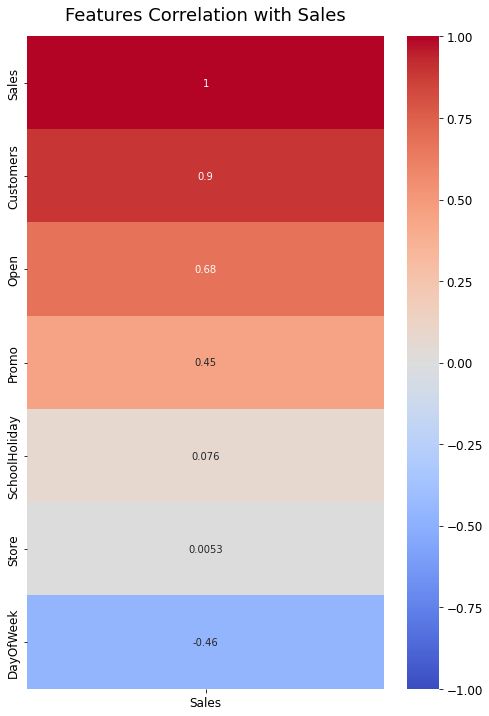

In [ ]:
#Plot the features correlation with Sales
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(train.corr()[['Sales']].sort_values(by='Sales', ascending=False), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
heatmap.set_title('Features Correlation with Sales', fontdict={'fontsize':18}, pad=16)

In [ ]:
# Check the skewness
#train_explore = undummify(train_new)
train_explore = labelencoding(train_explore)
skewness=[]
for i in train_explore.columns:
    skewness.append(train_explore[i].skew())
pd.DataFrame(data=skewness,index=train_explore.columns,columns=['skewness']).sort_values(by='skewness',ascending=False)

Label Encoding: DayOfWeek - 7
Label Encoding: Open - 2
Label Encoding: Promo - 2
Label Encoding: StateHoliday - 4
Label Encoding: SchoolHoliday - 2
Label Encoding: year - 3
Label Encoding: Store - 1115
Label Encoding: day - 31
Label Encoding: month - 12


skewness
StateHoliday   7.330131
SchoolHoliday  1.738972
Sales          0.645957
Promo          0.493650
year           0.368486
month          0.305860
day            0.008634
DayOfWeek      0.001649
Store         -0.000988
Open          -1.743754

***Inferences from the Skweness:*** 
* As a general rule of thumb: If skewness is less than -1 or greater than 1, the distribution is highly skewed. If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed. If skewness is between -0.5 and 0.5, the distribution is approximately symmetric. The highly skewed parameters is a sign of some outliers.

- Hence StateHoliday (correlates with SchoolHoliday) and open stores are highly skewed features.

In [ ]:
## Map day and month for EDA below
# Explicitly define the days of the week and month to see sale values,etc.
day_map = {   # Map days from numbers to characters
    0: 'MON',
    1: 'TUE',
    2: 'WED',
    3: 'THU',
    4: 'FRI',
    5: 'SAT',
    6: 'SUN'
}
month_map = {   # Map days from numbers to characters
    0: 'JAN',
    1: 'FEB',
    2: 'MAR',
    3: 'APR',
    4: 'MAY',
    5: 'JUN',
    6: 'JUL',
    7: 'AUG',
    8: 'SEP',
    9: 'OCT',
    10: 'NOV',
    11: 'DEC'
}

train_eda = train.copy()
train_eda['day_of_week_name'] = pd.DatetimeIndex(train_eda['Date']).dayofweek.map(day_map)
train_eda['month_name'] = pd.DatetimeIndex(train_eda['Date']).month.map(month_map)
train_eda['year'] = pd.DatetimeIndex(train_eda['Date']).year # Get the year
train_eda['day'] = pd.DatetimeIndex(train_eda['Date']).day # Get the day
train_eda.head()

Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          2  2015-06-30   5735        568     1      1            0   
1      2          2  2015-06-30   9863        877     1      1            0   
2      3          2  2015-06-30  13261       1072     1      1            0   
3      4          2  2015-06-30  13106       1488     1      1            0   
4      5          2  2015-06-30   6635        645     1      1            0   

   SchoolHoliday day_of_week_name month_name  year  day  
0              0              TUE        JUL  2015   30  
1              0              TUE        JUL  2015   30  
2              1              TUE        JUL  2015   30  
3              0              TUE        JUL  2015   30  
4              0              TUE        JUL  2015   30

In [ ]:
# Look at the sales over various timeframes for all the stores

if(plotlyme == True):
    df1 = train_eda

    print('------------------------------------------------------------------------')
    print(f'Distribution of Sales for All the Stores Combined Over Various Timeframes')
    print('------------------------------------------------------------------------')
    
    # Year Sales
    df1 = train_eda
    fig1 = plt.figure()
    fig1 = df1.groupby('year')['Sales'].nunique().iplot(kind = 'bar',
                                                                                  color = 'blue',orientation = 'h',
                                                                                  asFigure=True,
                                                                                  title = 'Distribution of Yearly Sales'
                                                                                 )
    fig1.show(renderer='colab') #(renderer="svg")
    
    
    # Monthly Sales
    fig2 = plt.figure()
    fig2 = df1.groupby('month_name')['Sales'].nunique().iplot(kind = 'bar',
                                                                                  color = 'green',orientation = 'h',
                                                                                  asFigure=True,
                                                                                  title = 'Distribution of Monthly Sales'
                                                                                 )
    fig2.show(renderer='colab') #(renderer="svg")
    
    
    

    # Weekly Sales 
    fig3 = plt.figure()
    fig3 = df1.groupby('day_of_week_name')['Sales'].nunique().iplot(kind = 'bar',
                                                                                  color = 'cyan',orientation = 'h',
                                                                                  asFigure=True,
                                                                                  title = 'Distribution of Weekly Sales'
                                                                                 )
    fig3.show(renderer='colab') #(renderer="svg")    
    



    # Daily Sales 
    fig4 = plt.figure()
    fig4 = df1.groupby('day')['Sales'].nunique().iplot(kind = 'bar',
                                                                                  color = 'red',orientation = 'h',
                                                                                  asFigure=True,
                                                                                  title = 'Distribution of Daily Sales'
                                                                                 )
    fig4.show(renderer='colab') #(renderer="svg")  


------------------------------------------------------------------------
Distribution of Sales for All the Stores Combined Over Various Timeframes
------------------------------------------------------------------------


<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

In [ ]:
# Look at the sales over various timeframes for all the stores

if(plotlyme == True):

    random_store = random.choice(range(df1['Store'].nunique())) # Choose a store randomly
    df2 = df1[df1.Store==random_store]

    print('------------------------------------------------------------------------')
    print(f'Distribution of Sales for Store {random_store} Over Various Timeframes')
    print('------------------------------------------------------------------------')
    
    # Year Sales
    fig1 = plt.figure()
    fig1 = df2.groupby('year')['Sales'].nunique().iplot(kind = 'bar',
                                                                                  color = 'blue',orientation = 'h',
                                                                                  asFigure=True,
                                                                                  title = f'Distribution of Yearly Sales for Store {random_store}'
                                                                                 )
    fig1.show(renderer='colab') #(renderer="svg")
    
    
    # Monthly Sales
    fig2 = plt.figure()
    fig2 = df2.groupby('month_name')['Sales'].nunique().iplot(kind = 'bar',
                                                                                  color = 'green',orientation = 'h',
                                                                                  asFigure=True,
                                                                                  title = f'Distribution of Monthly Sales for Store {random_store}'
                                                                                 )
    fig2.show(renderer='colab') #(renderer="svg")
    
    
    

    # Weekly Sales 
    fig3 = plt.figure()
    fig3 = df2.groupby('day_of_week_name')['Sales'].nunique().iplot(kind = 'bar',
                                                                                  color = 'cyan',orientation = 'h',
                                                                                  asFigure=True,
                                                                                  title = f'Distribution of Weekly Sales for Store {random_store}'
                                                                                 )
    fig3.show(renderer='colab') #(renderer="svg")    
    



    # Daily Sales 
    fig4 = plt.figure()
    fig4 = df2.groupby('day')['Sales'].nunique().iplot(kind = 'bar',
                                                                                  color = 'red',orientation = 'h',
                                                                                  asFigure=True,
                                                                                  title = f'Distribution of Daily Sales for Store {random_store} '
                                                                                 )
    fig4.show(renderer='colab') #(renderer="svg")  


------------------------------------------------------------------------
Distribution of Sales for Store 173 Over Various Timeframes
------------------------------------------------------------------------


<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

In [ ]:
#if(plotlyme == True):
#    fig = go.Figure(
#        data=[go.Bar(y=df1.groupby('day_of_week_name')['Sales'].nunique(),x=)],
#        layout_title_text="Distribution of orders in the Sales"
#    )
#    fig.show(renderer="svg")

In [ ]:
# Define a function to check and remove zero variance columns
def handle_variance(df,threshold=0): #Set default threshold to zero
  variance = df.var()
  var_column = df.columns
  variable = []
  for i in range(0,len(variance)):
    if variance[i]>=threshold: # Set the threshold to your choice
      variable.append(var_column[i]) 
 # print(f'The significant columns are')
 # display(variable)
  return df[variable]

In [ ]:
handle_variance(train_new,0)

Sales  DayOfWeek_2  DayOfWeek_3  DayOfWeek_4  DayOfWeek_5  \
0        5735.0            1            0            0            0   
1        9863.0            1            0            0            0   
2       13261.0            1            0            0            0   
3       13106.0            1            0            0            0   
4        6635.0            1            0            0            0   
...         ...          ...          ...          ...          ...   
982639      0.0            1            0            0            0   
982640      0.0            1            0            0            0   
982641      0.0            1            0            0            0   
982642      0.0            1            0            0            0   
982643      0.0            1            0            0            0   

        DayOfWeek_6  DayOfWeek_7  Open_1  Promo_1  StateHoliday_1  ...  \
0                 0            0       1        1               0  ...   
1                 0            0       1        1               0  ...   
2                 0            0       1        1               0  ...   
3                 0            0       1        1               0  ...   
4                 0            0       1        1               0  ...   
...             ...          ...     ...      ...             ...  ...   
982639            0            0       0        0               1  ...   
982640            0            0       0        0               1  ...   
982641            0            0       0        0               1  ...   
982642            0            0       0        0               1  ...   
982643            0            0       0        0               1  ...   

        month_3  month_4  month_5  month_6  month_7  month_8  month_9  \
0             0        0        0        1        0        0        0   
1             0        0        0        1        0        0        0   
2             0        0        0        1        0        0        0   
3             0        0        0        1        0        0        0   
4             0        0        0        1        0        0        0   
...         ...      ...      ...      ...      ...      ...      ...   
982639        0        0        0        0        0        0        0   
982640        0        0        0        0        0        0        0   
982641        0        0        0        0        0        0        0   
982642        0        0        0        0        0        0        0   
982643        0        0        0        0        0        0        0   

        month_10  month_11  month_12  
0              0         0         0  
1              0         0         0  
2              0         0         0  
3              0         0         0  
4              0         0         0  
...          ...       ...       ...  
982639         0         0         0  
982640         0         0         0  
982641         0         0         0  
982642         0         0         0  
982643         0         0         0  

[982644 rows x 1170 columns]

#### Linear Regression ML Model - Using Store as a feature

In [ ]:
# Define function to scale the data
def scaleData(data):       
    scaler = MinMaxScaler(feature_range=(0, 1))
    data_colums = data.columns
    data = scaler.fit_transform(data)
    return pd.DataFrame(data,columns=data_colums) 

In [ ]:
# Get the Features and Target for ML training 
X_train = train_new.drop(['Sales'],axis=1)
X_val = test_val_new.drop(['Sales'],axis=1)
y_train = train_new['Sales']
y_val = test_val_new['Sales']

In [ ]:
X_train = scaleData(X_train)
X_val = scaleData(X_val)

In [ ]:
print(X_train.shape,X_val.shape,y_train.shape,y_val.shape)

(982644, 1169) (34565, 1169) (982644,) (34565,)


In [ ]:
lr_with_StoreID = LinearRegression()
lr_with_StoreID.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred_with_StoreID = lr_with_StoreID.predict(X_val)
print('===================================================')
print('Metrics for features that included the Store ID')
print('MSE',np.sqrt(mean_squared_error(y_pred_with_StoreID,y_val)))
print('MAE',mean_absolute_error(y_pred_with_StoreID,y_val))
print('The accuracy of training dataset is',lr_with_StoreID.score(X_train,y_train))
print('The accuracy of the test dataset is',lr_with_StoreID.score(X_val,y_val))
print('===================================================')

Metrics for features that included the Store ID
MSE 1483.5427742707802
MAE 1093.565207550233
The accuracy of training dataset is 0.8365645595889428
The accuracy of the test dataset is 0.8307708054564857


#### Linear Regression ML Model - Without Store as a feature

In [ ]:
# Get the Features and Target for ML training 
X_train_no_store = removecolumns(X_train,'Store')
X_val_no_store = removecolumns(X_val,'Store')
y_train = train_new['Sales']
y_val = test_val_new['Sales']

In [ ]:
lr_without_StoreID = LinearRegression()
lr_without_StoreID.fit(X_train_no_store,y_train)

LinearRegression()

In [ ]:
y_pred_notwith_StoreID = lr_without_StoreID.predict(X_val_no_store)
print('===================================================')
print('Metrics for features without the Store ID')
print('MSE',np.sqrt(mean_squared_error(y_pred_notwith_StoreID,y_val)))
print('MAE',mean_absolute_error(y_pred_notwith_StoreID,y_val))
print('The accuracy of training dataset is',lr_without_StoreID.score(X_train_no_store,y_train))
print('The accuracy of the test dataset is',lr_without_StoreID.score(X_val_no_store,y_val))
print('===================================================')

Metrics for features without the Store ID
MSE 2551.195756009517
MAE 1748.8501702089025
The accuracy of training dataset is 0.5645990410447581
The accuracy of the test dataset is 0.49954767679764356


#### Linear Regression ML Model - Separate Model for each Store

In [ ]:
#df_all_eachstore
# Perform Label Encoding
columns_to_encode = ['DayOfWeek', 'Open', 'Promo','StateHoliday',
                     'SchoolHoliday', 'year','day','month']
          

df_all_eachstore= pd.get_dummies(df_all_eachstore,columns=columns_to_encode,drop_first=True)

In [ ]:
# Separate the data to the original form
#df_all_eachstore = concatenated_data
train_new_eachstore = df_all_eachstore.iloc[:982644].reset_index(drop=True)
test_val_eachstore = df_all_eachstore.iloc[982644:1017209].reset_index(drop=True)
test_eachstore = df_all_eachstore.iloc[1017209:].reset_index(drop=True)
print(train_new_eachstore.shape,test_val_eachstore.shape,test_eachstore.shape)

(982644, 57) (34565, 57) (34565, 57)


In [ ]:
train_new_eachstore

Store    Sales  DayOfWeek_2  DayOfWeek_3  DayOfWeek_4  DayOfWeek_5  \
0           1   5735.0            1            0            0            0   
1           2   9863.0            1            0            0            0   
2           3  13261.0            1            0            0            0   
3           4  13106.0            1            0            0            0   
4           5   6635.0            1            0            0            0   
...       ...      ...          ...          ...          ...          ...   
982639   1111      0.0            1            0            0            0   
982640   1112      0.0            1            0            0            0   
982641   1113      0.0            1            0            0            0   
982642   1114      0.0            1            0            0            0   
982643   1115      0.0            1            0            0            0   

        DayOfWeek_6  DayOfWeek_7  Open_1  Promo_1  ...  month_3  month_4  \
0                 0            0       1        1  ...        0        0   
1                 0            0       1        1  ...        0        0   
2                 0            0       1        1  ...        0        0   
3                 0            0       1        1  ...        0        0   
4                 0            0       1        1  ...        0        0   
...             ...          ...     ...      ...  ...      ...      ...   
982639            0            0       0        0  ...        0        0   
982640            0            0       0        0  ...        0        0   
982641            0            0       0        0  ...        0        0   
982642            0            0       0        0  ...        0        0   
982643            0            0       0        0  ...        0        0   

        month_5  month_6  month_7  month_8  month_9  month_10  month_11  \
0             0        1        0        0        0         0         0   
1             0        1        0        0        0         0         0   
2             0        1        0        0        0         0         0   
3             0        1        0        0        0         0         0   
4             0        1        0        0        0         0         0   
...         ...      ...      ...      ...      ...       ...       ...   
982639        0        0        0        0        0         0         0   
982640        0        0        0        0        0         0         0   
982641        0        0        0        0        0         0         0   
982642        0        0        0        0        0         0         0   
982643        0        0        0        0        0         0         0   

        month_12  
0              0  
1              0  
2              0  
3              0  
4              0  
...          ...  
982639         0  
982640         0  
982641         0  
982642         0  
982643         0  

[982644 rows x 57 columns]

In [ ]:
# Remove zero variance columns
handle_variance(train_new_eachstore,0.0)

Store    Sales  DayOfWeek_2  DayOfWeek_3  DayOfWeek_4  DayOfWeek_5  \
0           1   5735.0            1            0            0            0   
1           2   9863.0            1            0            0            0   
2           3  13261.0            1            0            0            0   
3           4  13106.0            1            0            0            0   
4           5   6635.0            1            0            0            0   
...       ...      ...          ...          ...          ...          ...   
982639   1111      0.0            1            0            0            0   
982640   1112      0.0            1            0            0            0   
982641   1113      0.0            1            0            0            0   
982642   1114      0.0            1            0            0            0   
982643   1115      0.0            1            0            0            0   

        DayOfWeek_6  DayOfWeek_7  Open_1  Promo_1  ...  month_3  month_4  \
0                 0            0       1        1  ...        0        0   
1                 0            0       1        1  ...        0        0   
2                 0            0       1        1  ...        0        0   
3                 0            0       1        1  ...        0        0   
4                 0            0       1        1  ...        0        0   
...             ...          ...     ...      ...  ...      ...      ...   
982639            0            0       0        0  ...        0        0   
982640            0            0       0        0  ...        0        0   
982641            0            0       0        0  ...        0        0   
982642            0            0       0        0  ...        0        0   
982643            0            0       0        0  ...        0        0   

        month_5  month_6  month_7  month_8  month_9  month_10  month_11  \
0             0        1        0        0        0         0         0   
1             0        1        0        0        0         0         0   
2             0        1        0        0        0         0         0   
3             0        1        0        0        0         0         0   
4             0        1        0        0        0         0         0   
...         ...      ...      ...      ...      ...       ...       ...   
982639        0        0        0        0        0         0         0   
982640        0        0        0        0        0         0         0   
982641        0        0        0        0        0         0         0   
982642        0        0        0        0        0         0         0   
982643        0        0        0        0        0         0         0   

        month_12  
0              0  
1              0  
2              0  
3              0  
4              0  
...          ...  
982639         0  
982640         0  
982641         0  
982642         0  
982643         0  

[982644 rows x 57 columns]

In [ ]:
range(train_new_eachstore['Store'].nunique())

range(0, 1115)

In [ ]:
y_pred_store=[]

train_each_store = train_new_eachstore.groupby(['Store'])
test_each_store = test_val_eachstore.groupby(['Store'])

for i in range(1,train_new_eachstore['Store'].nunique()+1):
    a = train_each_store.get_group(i)
    b = test_each_store.get_group(i)
    X_train = a.drop(['Sales','Store'],axis=1)
    X_val = b.drop(['Sales','Store'],axis=1)
    y_train = a['Sales']
    lr = LinearRegression()
    lr.fit(X_train,y_train)
    pred = lr.predict(X_val)
    i1=0
    for pred in b.index:
        y_pred_store.append(pred)
        i1+=1

print('===================================================')
print('Metrics for separate Store')
print('MSE',np.sqrt(mean_squared_error(y_pred_store,y_val)))
print('MAE',mean_absolute_error(y_pred_store,y_val))
print('===================================================')

Metrics for separate Store
MSE 15386.113245618637
MAE 12550.409084333864


#### Average Ensemble Model of first and second model

In [ ]:
average_predict=(y_pred_with_StoreID+y_pred_notwith_StoreID)/float(2)
print('===================================================')
print('Average metrics for both with and without Store ID')
print('MSE',np.sqrt(mean_squared_error(average_predict,y_val)))
print('MAE',mean_absolute_error(average_predict,y_val))
print('===================================================')

Average metrics for both with and without Store ID
MSE 1830.3801879825835
MAE 1306.092825423367


<b> Summary of the initial OLS Model </b>
- From the above 3 models we can conclude that the model performance for when we include (or not include) 'Store as a feature is almost the same.

- The model with each of the stores treated individually showed worse performance compared to the two approach abive. 

## Regularization

#### Regularization using Store as a Feature

In [ ]:
X_train = train_new.drop(['Sales'],axis=1)
X_val = test_val_new.drop(['Sales'],axis=1)
y_train = train_new['Sales']
y_val = test_val_new['Sales']


X_train = scaleData(X_train)
X_val = scaleData(X_val)

rigdeR =Ridge(alpha=12)
rigdeR.fit(X_train,y_train)

y_predict_regularize = rigdeR.predict(X_val)
print('===================================================')
print('Metrics using Store ID as a feature with regularization')
print('MSE',np.sqrt(mean_squared_error(y_predict_regularize,y_val)))
print('MAE',mean_absolute_error(y_predict_regularize,y_val))
print('train model score',rigdeR.score(X_train,y_train))
print('test model score',rigdeR.score(X_val,y_val))
print('===================================================')

Metrics using Store ID as a feature with regularization
MSE 1486.292574238627
MAE 1095.701414413162
train model score 0.8363359250444383
test model score 0.8301428792382727


<b> Comment on the Regularization </b>

- Regualrization did not lead to any significant improvement on the performance of the model.

## Exploring Impact of Closed Stores

In [ ]:
#df_all_eachstore_open = df_all.copy()
#df_all_nostore_open = df_all.copy()

columns_to_encode = ['DayOfWeek', 'Promo','StateHoliday', 
                     'SchoolHoliday', 'year','Store','day','month']

df_all_eachstore_open= pd.get_dummies(df_all_eachstore_open,columns=columns_to_encode,drop_first=True)
#df_all.head()
train_new_eachstore_open = df_all_eachstore_open.iloc[:982644].reset_index(drop=True)
test_val_new_eachstore_open = df_all_eachstore_open.iloc[982644:1017209].reset_index(drop=True)
test_new = df_all_eachstore_open.iloc[1017209:].reset_index(drop=True)
print(train_new.shape,test_val_new.shape,test_new.shape)

(982644, 1170) (34565, 1170) (34565, 1170)


#### Model One - Store as a Feature

In [ ]:
X_train_mdl1 = train_new_eachstore_open.drop(['Sales','Open'],axis=1)
X_val_mdl1 = test_val_new_eachstore_open.drop(['Sales','Open'],axis=1)

lr = LinearRegression()
lr.fit(X_train_mdl1,y_train)
pred1 = lr.predict(X_val_mdl1)

ind=test_val_new_eachstore_open[test_val_new_eachstore_open.Open==0].index
for i in ind:
    pred1[i] = 0
    
print('===================================================')
print('Metrics using Store ID for closed store')    
print('MSE',np.sqrt(mean_squared_error(pred1,y_val)))
print('MAE',mean_absolute_error(pred1,y_val))
print('===================================================')

Metrics using Store ID for closed store
MSE 1300.4758108088865
MAE 876.79506813703


#### Model Two - Store not a Feature

In [ ]:
#df_all_eachstore_open = df_all.copy()
#df_all_nostore_open = df_all.copy()

columns_to_encode = ['DayOfWeek', 'Promo','StateHoliday', 
                     'SchoolHoliday', 'year','day','month']

df_all_nostore_open= pd.get_dummies(df_all_nostore_open,columns=columns_to_encode,drop_first=True)
#df_all.head()
train_new_nostore_open = df_all_nostore_open.iloc[:982644].reset_index(drop=True)
test_val_new_nostore_open = df_all_nostore_open.iloc[982644:1017209].reset_index(drop=True)
test_new = df_all_nostore_open.iloc[1017209:].reset_index(drop=True)
print(train_new_nostore_open.shape,test_val_new_nostore_open.shape,test_new.shape)

(982644, 57) (34565, 57) (34565, 57)


In [ ]:
X_train_mdl2 = train_new_nostore_open.drop(['Sales','Open','Store'],axis=1)
X_val_mdl2 = test_val_new_nostore_open.drop(['Sales','Open','Store'],axis=1)

lr = LinearRegression()
lr.fit(X_train_mdl2,y_train)
pred2 = lr.predict(X_val_mdl2)

ind=test_val_new_nostore_open[test_val_new_nostore_open.Open==0].index
for i in ind:
    pred2[i] = 0
    
print('===================================================')
print('Metrics without Store ID as feature for closed store')     
print('MSE',np.sqrt(mean_squared_error(pred2,y_val)))
print('MAE',mean_absolute_error(pred2,y_val))
print('===================================================')

Metrics without Store ID as feature for closed store
MSE 2572.2387368918603
MAE 1728.5235989113787


#### Model Three - Modeling per Store Type

In [ ]:
pred3=np.zeros(test_val.shape[0])

train_store = train_new_nostore_open.groupby(['Store'])
test_store = test_val_new_nostore_open.groupby(['Store'])

for i in range(1,train_new_nostore_open['Store'].nunique()+1):
    a = train_store.get_group(i)
    b = test_store.get_group(i)
    X_train = a.drop(['Sales','Store','Open'],axis=1)
    X_val = b.drop(['Sales','Store','Open'],axis=1)
    Y_train = a['Sales']
    lr = LinearRegression()
    lr.fit(X_train,Y_train)
    pred = lr.predict(X_val)
    i=0
    ind=b[b['Open']==0].index
    for j in b.index:
        if(j in ind):
            pred3[j]=0
        else:
            pred3[j]=pred[i]
        i+=1
print('===================================================')
print('Metrics without Store ID as feature for open store') 
print('MSE',np.sqrt(mean_squared_error(pred3,y_val)))
print('MAE',mean_absolute_error(pred3,y_val))
print('===================================================')

Metrics without Store ID as feature for open store
MSE 941.5217540887892
MAE 639.5011216075736


<b> Comment on Metrics of Models 1-3 </b>
- Based on the error metrics, there is a significant improvement when we model the stores as a group as could be seen from Model 3 above. 
- Based on this improved performance, we carried out regularization of Model 3 below.

#### Regularization of Model 3

In [ ]:
pred_regularize=np.zeros(test_val_new_nostore_open.shape[0])
train_store = train_new_nostore_open.groupby(['Store'])
test_store = test_val_new_nostore_open.groupby(['Store'])



for i in range(1,train_new_nostore_open['Store'].nunique()+1):
    a = train_store.get_group(i)
    b = test_store.get_group(i)
    X_train = a.drop(['Sales','Store','Open'],axis=1)
    X_val = b.drop(['Sales','Store','Open'],axis=1)
    Y_train = a['Sales']
    lr = Ridge(alpha=20)
    lr.fit(X_train,Y_train)
    pred = lr.predict(X_val)
    i=0
    ind=b[b['Open']==0].index
    for j in b.index:
        if(j in ind):
            pred_regularize[j]=0
        else:
            pred_regularize[j]=pred[i]
        i+=1
print('===================================================')
print('Metrics without Store ID as feature for closed stores using regularization') 
print('MSE',np.sqrt(mean_squared_error(pred_regularize,y_val)))
print('MAE',mean_absolute_error(pred_regularize,y_val))
print('===================================================')

Metrics without Store ID as feature for closed stores using regularization
MSE 1005.4580435317876
MAE 686.024616194529


<b> Comment on Regularization of Model 3 </b>
- Based on the error metrics, regularization does not improve the model performance:
******

Before regularization:                 MSE 941.52     |      MAE 639.50

after reegularization:  MSE 1005.467   |          MAE 686.02
******

## PCA Analysis and Factor Analysis

### Factor Analysis
<b> Perform factor analysis first before the PCA </b>

In [ ]:
# Perform Bartlett’s test of sphericity, which checks whether or not the observed variables intercorrelate.
chi_square_value,p_value=calculate_bartlett_sphericity(train_new)
chi_square_value, p_value

(17032103.17674987, 0.0)

#### Comment on the Bartlett's test
***The p-value is 0, which implies statistically significant - the observed correlation matrix is not an identity matrix***

In [ ]:
### Perform Kaiser-Meyer-Olkin (KMO) Test - It measures the suitability of data for factor analysis
kmo_all,kmo_model=calculate_kmo(train_new)
kmo_model

3.880893576624906e-05

#### Comment on the KMO 
<b> The overall KMO for our data is practically zero, which indicates that factor analysis is not needed.</b>

## Perform PCA Analysis - TruncatedSVD is more efficient due to the large dataset

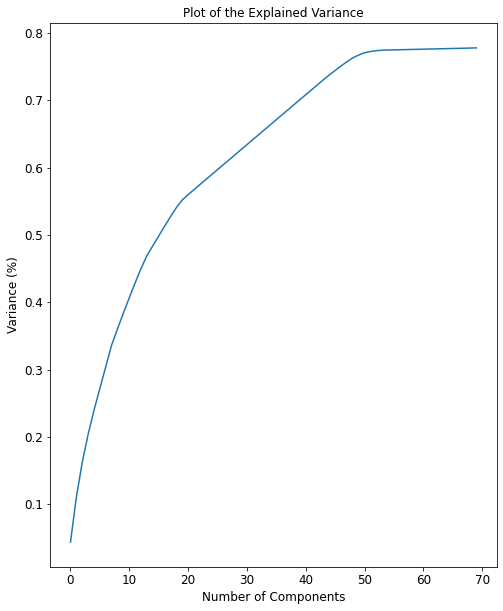

In [ ]:
timet = time.time() # Calculate time
X_train = train_new.drop(['Sales'],axis=1)
X_val = test_val_new.drop(['Sales'],axis=1)
y_train = train_new['Sales']
y_val = test_val_new['Sales']

X_train = scaleData(X_train)
X_val = scaleData(X_val)

#n_components = 100  
#ipca = IncrementalPCA(n_components=n_components,batch_size=n_components)
#pca = ipca.fit(X_train)
##pca = ipca.fit_transform(X_train)

n_components = train_new.shape[-1]-1100  
tpca = TruncatedSVD(n_components=n_components, algorithm='arpack')
pca = tpca.fit(X_train)

plt.figure(figsize=(8,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Plot of the Explained Variance')
plt.show()

### Comment on the PCA
***The PCA shows that only about 80% of the variance is explained by approximately 70 of the components. As you can see, the slope of the cummulative explained variance is still very sleep, which indicates saturation (i.e., approach to 1=>100%) is still far away. I must emphasize that the PCA is very memory intensive operation. I have used the truncatedSVD for it since it shows better scaling with memory utilization.***

In [ ]:
# Perform the Data transformation with the PCA

X_train_pca = pca.transform(X_train)
X_val_pca = pca.transform(X_val)
y_train = train_new['Sales']
y_val = test_val_new['Sales']
print(f'Time for PCA fit and data transformation is: {time.time()-timet}')

Time for PCA fit and data transformation is: 905.1391177177429


In [ ]:
# Testing the accuracy with the PCA using Linear regression
lr_with_StoreID = LinearRegression()
lr_with_StoreID.fit(X_train_pca,y_train)
y_pred_with_StoreID = lr_with_StoreID.predict(X_val_pca)
print('===================================================')
print('Metrics for features that included the Store ID using')
print('MSE',np.sqrt(mean_squared_error(y_pred_with_StoreID,y_val)))
print('MAE',mean_absolute_error(y_pred_with_StoreID,y_val))
print('The accuracy of training dataset is',lr_with_StoreID.score(X_train_pca,y_train))
print('The accuracy of the test dataset is',lr_with_StoreID.score(X_val_pca,y_val))
print('===================================================')

Metrics for features that included the Store ID using
MSE 2519.3182235647196
MAE 1741.5141764809723
The accuracy of training dataset is 0.5715665703902859
The accuracy of the test dataset is 0.5119759795185224


# Beyond OLS - Ensemble ML and Cross Validation

#### Baseline Modeling - Random Forest Regression 
***Let's use RF as baseline ML model to establish the features for the beyond OLS***

In [ ]:
#With Store as Feature
#X_train = train_new.drop(['Sales','Open'],axis=1)
#X_val = test_val_new.drop(['Sales','Open'],axis=1)
X_train = train_new_eachstore_open.drop(['Sales','Open'],axis=1)
X_val = test_val_new_eachstore_open.drop(['Sales','Open'],axis=1)


y_train = train_new['Sales']
y_val = test_val_new['Sales']

catmodel = CatBoostRegressor(loss_function='RMSE',iterations=400)
catmodel.fit(X_train,y_train)
pred_catmodel = catmodel.predict(X_val)

#ind=test_val_new_eachstore_open[test_val_new_eachstore_open.Open==0].index
#for i in ind:
#    pred_rf[i] = 0

print('===================================================')
print('Metrics with Store ID as feature for closed stores using Catboost')     
print('MSE',np.sqrt(mean_squared_error(pred_catmodel,y_val)))
print('MAE',mean_absolute_error(pred_catmodel,y_val))
print('The accuracy of training dataset is',catmodel.score(X_train,y_train))
print('The accuracy of the test dataset is',catmodel.score(X_val,y_val))
print('===================================================')

Learning rate set to 0.256155
0:	learn: 3372.6352407	total: 82.7ms	remaining: 33s
1:	learn: 3067.1255429	total: 111ms	remaining: 22.1s
2:	learn: 2869.3037856	total: 138ms	remaining: 18.3s
3:	learn: 2750.3612600	total: 166ms	remaining: 16.5s
4:	learn: 2671.8938808	total: 196ms	remaining: 15.5s
5:	learn: 2613.9327969	total: 223ms	remaining: 14.6s
6:	learn: 2572.0988625	total: 250ms	remaining: 14s
7:	learn: 2540.6625385	total: 276ms	remaining: 13.5s
8:	learn: 2502.0295630	total: 306ms	remaining: 13.3s
9:	learn: 2476.8991321	total: 332ms	remaining: 13s
10:	learn: 2455.2051511	total: 357ms	remaining: 12.6s
11:	learn: 2433.9348471	total: 383ms	remaining: 12.4s
12:	learn: 2416.3586215	total: 410ms	remaining: 12.2s
13:	learn: 2401.0107802	total: 435ms	remaining: 12s
14:	learn: 2385.7671614	total: 461ms	remaining: 11.8s
15:	learn: 2372.7879073	total: 488ms	remaining: 11.7s
16:	learn: 2359.1389156	total: 516ms	remaining: 11.6s
17:	learn: 2345.8079123	total: 542ms	remaining: 11.5s
18:	learn: 2333

In [ ]:
#Without Store as a Feature
#X_train = train_new.drop(['Sales','Open','Store'],axis=1)
#X_val = test_val_new.drop(['Sales','Open','Store'],axis=1)
X_train = train_new_nostore_open.drop(['Sales','Open','Store'],axis=1)
X_val = test_val_new_nostore_open.drop(['Sales','Open','Store'],axis=1)

catmodel =  CatBoostRegressor(loss_function='RMSE',iterations=400)
catmodel.fit(X_train,y_train)
y_pred = catmodel.predict(X_val)
print('The accuracy of training dataset is',catmodel.score(X_train,y_train))
print('The accuracy of the test dataset is',catmodel.score(X_val,y_val))

ind=test_val_new_nostore_open[test_val_new_nostore_open.Open==0].index
for i in ind:
    y_pred[i] = 0

print('===================================================')
print('Metrics without Store as a feature for closed stores using Catboost')    
print('MSE',np.sqrt(mean_squared_error(y_pred,y_val)))
print('MAE',mean_absolute_error(y_pred,y_val))
print('===================================================')

Learning rate set to 0.256155
0:	learn: 3378.6818842	total: 26.9ms	remaining: 10.7s
1:	learn: 3081.8731561	total: 51.9ms	remaining: 10.3s
2:	learn: 2904.6295070	total: 76.2ms	remaining: 10.1s
3:	learn: 2797.8383785	total: 103ms	remaining: 10.2s
4:	learn: 2732.6908795	total: 132ms	remaining: 10.4s
5:	learn: 2693.3484726	total: 164ms	remaining: 10.8s
6:	learn: 2670.9863296	total: 197ms	remaining: 11.1s
7:	learn: 2650.9143176	total: 223ms	remaining: 10.9s
8:	learn: 2631.6866544	total: 252ms	remaining: 10.9s
9:	learn: 2624.3722963	total: 276ms	remaining: 10.8s
10:	learn: 2613.8241370	total: 305ms	remaining: 10.8s
11:	learn: 2607.3086842	total: 331ms	remaining: 10.7s
12:	learn: 2599.7412624	total: 359ms	remaining: 10.7s
13:	learn: 2596.8544215	total: 385ms	remaining: 10.6s
14:	learn: 2593.0642256	total: 412ms	remaining: 10.6s
15:	learn: 2590.1959218	total: 438ms	remaining: 10.5s
16:	learn: 2586.4282486	total: 465ms	remaining: 10.5s
17:	learn: 2584.6669375	total: 490ms	remaining: 10.4s
18:	l

In [ ]:
#Separate model for each Store
pred_each=np.zeros(test_val.shape[0])

train_store = train_new_nostore_open.groupby(['Store'])
test_store = test_val_new_nostore_open.groupby(['Store'])

for i in range(1,train_new_nostore_open['Store'].nunique()+1):
    a = train_store.get_group(i)
    b = test_store.get_group(i)
    X_train = a.drop(['Sales','Store','Open'],axis=1).values
    X_val = b.drop(['Sales','Store','Open'],axis=1).values
    y_train = a['Sales']
    clf =  CatBoostRegressor(loss_function='RMSE',iterations=400)
    clf.fit(X_train,y_train)
    pred = clf.predict(X_val)
    i=0
    ind=b[b['Open']==0].index
    for j in b.index:
        if(j in ind):
            pred_each[j]=0
        else:
            pred_each[j]=pred[i]
        i+=1
print('===================================================')
print('Metrics without Store as a feature for closed store for each using Catboost')
print('MSE',np.sqrt(mean_squared_error(pred_each,y_val)))
print('MAE',mean_absolute_error(pred_each,y_val))
print('===================================================')

Streaming output truncated to the last 5000 lines.
217:	learn: 527.3696006	total: 120ms	remaining: 100ms
218:	learn: 526.3734206	total: 120ms	remaining: 99.5ms
219:	learn: 525.5588464	total: 121ms	remaining: 99ms
220:	learn: 524.6028028	total: 121ms	remaining: 98.4ms
221:	learn: 523.7361439	total: 122ms	remaining: 97.8ms
222:	learn: 523.0814152	total: 122ms	remaining: 97.2ms
223:	learn: 521.9915407	total: 123ms	remaining: 96.7ms
224:	learn: 520.9969778	total: 124ms	remaining: 96.1ms
225:	learn: 520.4863648	total: 124ms	remaining: 95.5ms
226:	learn: 519.7068125	total: 125ms	remaining: 95.4ms
227:	learn: 518.6178917	total: 126ms	remaining: 95.1ms
228:	learn: 517.5581266	total: 127ms	remaining: 94.6ms
229:	learn: 516.7701524	total: 127ms	remaining: 94.2ms
230:	learn: 515.9743089	total: 128ms	remaining: 93.8ms
231:	learn: 514.8114100	total: 129ms	remaining: 93.2ms
232:	learn: 513.8833162	total: 129ms	remaining: 92.7ms
233:	learn: 513.4374817	total: 130ms	remaining: 92.2ms
234:	learn: 512.3

<b> Comment on the baseline Modeling </b>
- The ML for separate model for each store peformed better based on the error metrics. 
- This is followed by when we include Store as one of the features
- Due to the computation demand for case 1, in building models for many approaches, we will adopt including Store as a feature to design our search for the best ML model. Once that is established, we can build an ML model for each of the stores

### Exploring and Exploiting the best ML Model

In [ ]:
# Use PCA from here

In [ ]:
# Get the Features and Target for exploring best ML model 
X_train = X_train_pca
X_test = X_val_pca
y_train = train_new['Sales']
y_test = test_val_new['Sales']


MLA = [
    LinearRegression(),
    RandomForestRegressor(n_estimators=50,max_features='sqrt',max_depth=8,random_state=random_seed,n_jobs=-1),
    #BayesianRidge(),
    #KNeighborsRegressor(),
    #LassoLars(alpha=0.01),
    #LassoLarsCV(),
    #ARDRegression(),
    #svm.LinearSVR(),
    #svm.SVR(), #Expensive
    #svm.NuSVR(), 
    #PLSRegression(n_components=2),
    DecisionTreeRegressor(),
    ExtraTreeRegressor(),
    #XGBRFRegressor(objective = 'reg:squarederror'),
    XGBRegressor(objective = 'reg:squarederror'),
    LGBMRegressor(),
    #AdaBoostRegressor(),
    #GradientBoostingRegressor(),
    #ExtraTreesRegressor(),
    CatBoostRegressor(loss_function='RMSE',iterations=400)
]


col = []
algorithms = pd.DataFrame(columns = col)
idx = 0

#Train and score algorithms
cv = RepeatedKFold(n_splits=10, n_repeats=10,random_state=random_seed) #Apply cross-validation
#cv = ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 110)

for model in MLA:
    try:
        model.fit(X_train, y_train)
        cross_validation = cross_val_score(model, X_train, y_train, cv  = cv,scoring='r2',n_jobs=-1)
        pred        = model.predict(X_test)
        adj_R2      = 1 - (1-model.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
        Train_Score = model.score(X_train, y_train)
        Test_Score  = model.score(X_test, y_test)
        MSE         = mean_squared_error(y_test, pred)
        MAE         = mean_absolute_error(y_test, pred)
#        MAPE        = mean_absolute_percentage_error(y_test, pred)*100
        RMSE        = np.sqrt(MSE)
        STD         = cross_validation.std()
  

        

        Alg = model.__class__.__name__
        algorithms.loc[idx, 'Algorithm'] = Alg

        algorithms.loc[idx, 'CV-Sc'] = round(cross_validation.mean()* 100, 2)
        algorithms.loc[idx, 'Model-Sc'] = round(Train_Score* 100,2)
        algorithms.loc[idx, 'Adj-Sc']  = round(adj_R2* 100, 2)
        algorithms.loc[idx, 'Test-Sc']   = round(Test_Score* 100, 2)
        algorithms.loc[idx, 'CV-Sc'] = round(cross_validation.mean()* 100, 2)
        algorithms.loc[idx, 'MSE']   = round(MSE, 2)
        algorithms.loc[idx, 'MAE']   = round(MAE, 2)
      #  algorithms.loc[idx, 'MAPE']   = round(MAPE, 2)
        algorithms.loc[idx, 'RMSE']   = round(RMSE, 2)
        algorithms.loc[idx, 'STD']   = round(STD, 4)
                
        CV_Score = pd.DataFrame({'CV-Scores for '+Alg: cross_validation})
        idx+=1
        display(CV_Score)
    except Exception as e:
        print(f"Exception occurred in {str(e)}")
        pass

CV-Scores for LinearRegression
0                         0.572901
1                         0.570853
2                         0.573089
3                         0.571883
4                         0.574198
..                             ...
95                        0.571958
96                        0.570284
97                        0.567381
98                        0.570684
99                        0.573830

[100 rows x 1 columns]

CV-Scores for RandomForestRegressor
0                              0.589968
1                              0.592578
2                              0.592415
3                              0.593527
4                              0.595493
..                                  ...
95                             0.590460
96                             0.590816
97                             0.588556
98                             0.592845
99                             0.594185

[100 rows x 1 columns]

CV-Scores for DecisionTreeRegressor
0                              0.834144
1                              0.840534
2                              0.836569
3                              0.837170
4                              0.835165
..                                  ...
95                             0.832443
96                             0.833025
97                             0.836719
98                             0.835113
99                             0.837001

[100 rows x 1 columns]

CV-Scores for ExtraTreeRegressor
0                           0.578379
1                           0.598135
2                           0.575131
3                           0.593911
4                           0.581538
..                               ...
95                          0.610656
96                          0.642887
97                          0.611920
98                          0.575957
99                          0.591376

[100 rows x 1 columns]

CV-Scores for XGBRegressor
0                     0.672143
1                     0.674488
2                     0.675447
3                     0.673457
4                     0.671165
..                         ...
95                    0.673746
96                    0.674903
97                    0.669658
98                    0.670147
99                    0.672300

[100 rows x 1 columns]

CV-Scores for LGBMRegressor
0                      0.845133
1                      0.848479
2                      0.846863
3                      0.845270
4                      0.847140
..                          ...
95                     0.846911
96                     0.848602
97                     0.844653
98                     0.843818
99                     0.843117

[100 rows x 1 columns]

Learning rate set to 0.256155
0:	learn: 3344.7648690	total: 103ms	remaining: 41.3s
1:	learn: 3023.6995202	total: 192ms	remaining: 38.2s
2:	learn: 2814.1072369	total: 273ms	remaining: 36.1s
3:	learn: 2685.8324067	total: 347ms	remaining: 34.4s
4:	learn: 2599.2814195	total: 416ms	remaining: 32.9s
5:	learn: 2551.0710503	total: 485ms	remaining: 31.9s
6:	learn: 2513.0625974	total: 546ms	remaining: 30.6s
7:	learn: 2471.2130877	total: 621ms	remaining: 30.4s
8:	learn: 2448.6882910	total: 709ms	remaining: 30.8s
9:	learn: 2416.7168468	total: 791ms	remaining: 30.9s
10:	learn: 2393.7011181	total: 855ms	remaining: 30.2s
11:	learn: 2372.2657429	total: 910ms	remaining: 29.4s
12:	learn: 2361.2919325	total: 992ms	remaining: 29.5s
13:	learn: 2335.3258202	total: 1.06s	remaining: 29.2s
14:	learn: 2319.6637087	total: 1.12s	remaining: 28.8s
15:	learn: 2296.9722183	total: 1.19s	remaining: 28.6s
16:	learn: 2288.1189433	total: 1.27s	remaining: 28.6s
17:	learn: 2279.7270026	total: 1.35s	remaining: 28.7s
18:	lear

CV-Scores for CatBoostRegressor
0                          0.917055
1                          0.919213
2                          0.918579
3                          0.919988
4                          0.918177
..                              ...
95                         0.917056
96                         0.916798
97                         0.916752
98                         0.915925
99                         0.916717

[100 rows x 1 columns]

In [ ]:
# Show the algorithms
algorithms

Algorithm  CV-Sc  Model-Sc  Adj-Sc  Test-Sc          MSE  \
0       LinearRegression  57.15     57.16   57.15    51.20   6346964.31   
1  RandomForestRegressor  59.18     59.37   59.37    50.27   6466989.38   
2  DecisionTreeRegressor  83.48     96.43   96.43    58.89   5346843.01   
3     ExtraTreeRegressor  59.44     96.43   96.43     2.65  12660729.22   
4           XGBRegressor  67.30     67.16   67.16    49.52   6565485.08   
5          LGBMRegressor  84.60     84.72   84.72    65.03   4547486.84   
6      CatBoostRegressor  91.80     92.08   92.08    84.62   2000876.17   

       MAE     RMSE     STD  
0  1741.51  2519.32  0.0023  
1  1722.08  2543.03  0.0027  
2  1433.96  2312.32  0.0035  
3  2290.75  3558.19  0.0229  
4  1735.31  2562.32  0.0025  
5  1409.26  2132.48  0.0019  
6   974.84  1414.52  0.0011

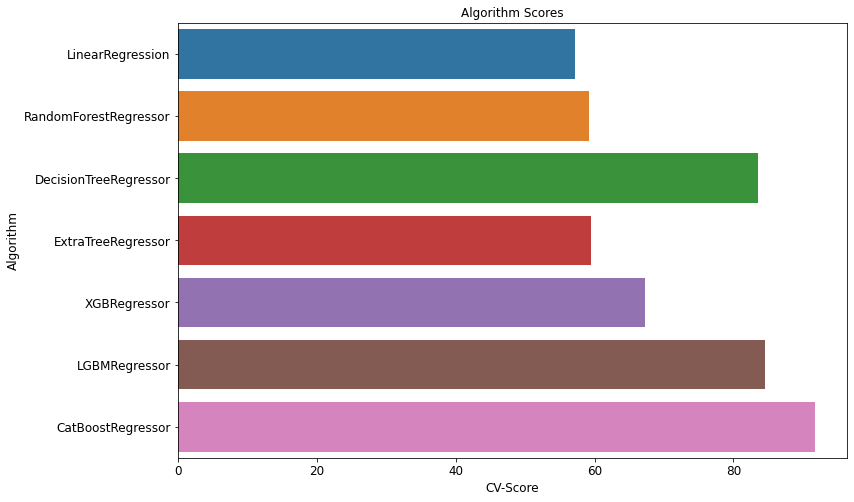

In [ ]:
#Plot them
ax = sns.barplot(x="CV-Sc", y="Algorithm", data = algorithms)
ax.set_xlabel("CV-Score")
ax = ax.set_title("Algorithm Scores")

In [ ]:
#Sort the 5 best models 
algorithms.sort_values(by = ['CV-Sc'], ascending = False, inplace = True)    
algorithms.head()

Algorithm  CV-Sc  Model-Sc  Adj-Sc  Test-Sc          MSE  \
6      CatBoostRegressor  91.80     92.08   92.08    84.62   2000876.17   
5          LGBMRegressor  84.60     84.72   84.72    65.03   4547486.84   
2  DecisionTreeRegressor  83.48     96.43   96.43    58.89   5346843.01   
4           XGBRegressor  67.30     67.16   67.16    49.52   6565485.08   
3     ExtraTreeRegressor  59.44     96.43   96.43     2.65  12660729.22   

       MAE     RMSE     STD  
6   974.84  1414.52  0.0011  
5  1409.26  2132.48  0.0019  
2  1433.96  2312.32  0.0035  
4  1735.31  2562.32  0.0025  
3  2290.75  3558.19  0.0229

## Comment on Beyond Ordinary Regression Model
<b> With ensemble ML model, we achieve over 90% accuracy in both the training data and the cross-validation score, and a robust test score of ~85% for the test dataset using the CatBoostRegressor, which showed overall best performance of the explored beyond ORM ML models. The high accuracy score is also consistent with the small MAE, RMSE, and the STD. </b> 

### Hyperparameter Tunning of the Best ML Model

In [ ]:
timet = time.time() # Calculate time

bestmodel = CatBoostRegressor()


#space = dict()
#space['n_estimators'] = range(50,126,25)
#space['iterations'] = [50, 100, 200,500]
#space['depth'] = [8,10,12]
#space['learning_rate'] = [0.01, 0.05, 0.1]
#space['loss_function'] =['RMSE']


parameters = {'depth' : [8,10],
              #'learning_rate' : [0.01, 0.05],
              'iterations'    : [400]
              }




#define the number of folds 
folds = RepeatedKFold(n_splits=10, n_repeats=10,random_state=random_seed)
# define search
gsc = RandomizedSearchCV(
    estimator=bestmodel,
    param_distributions=parameters,
#    n_iter=400,
    n_jobs= -1,
    random_state=random_seed,
    return_train_score=True,
    cv=folds
)


grid_result = gsc.fit(X_train, y_train)

print(f'Time for hyperparameter tuning for the best ML model is: {time.time()-timet}')

Learning rate set to 0.256155
0:	learn: 3318.6545704	total: 292ms	remaining: 1m 56s
1:	learn: 2968.1164491	total: 588ms	remaining: 1m 57s
2:	learn: 2753.7652873	total: 883ms	remaining: 1m 56s
3:	learn: 2605.6666227	total: 1.18s	remaining: 1m 56s
4:	learn: 2489.7173287	total: 1.47s	remaining: 1m 56s
5:	learn: 2422.4793524	total: 1.8s	remaining: 1m 58s
6:	learn: 2349.4731517	total: 2.12s	remaining: 1m 58s
7:	learn: 2291.1181649	total: 2.41s	remaining: 1m 58s
8:	learn: 2259.2187337	total: 2.71s	remaining: 1m 57s
9:	learn: 2196.2627365	total: 3.01s	remaining: 1m 57s
10:	learn: 2175.4460054	total: 3.33s	remaining: 1m 57s
11:	learn: 2094.2879912	total: 3.67s	remaining: 1m 58s
12:	learn: 2009.1904143	total: 4.01s	remaining: 1m 59s
13:	learn: 1992.6393042	total: 4.3s	remaining: 1m 58s
14:	learn: 1925.1280051	total: 4.62s	remaining: 1m 58s
15:	learn: 1859.8909578	total: 4.94s	remaining: 1m 58s
16:	learn: 1803.4262686	total: 5.25s	remaining: 1m 58s
17:	learn: 1792.9676015	total: 5.55s	remaining:

In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
means_trainscores = grid_result.cv_results_['mean_train_score'] #mean_train_score
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for test_mean, train_mean,stdev, param in zip(means,means_trainscores,stds,params):
  print("The test_mean is: %f and train_mean is: %f with std : %f and parameters: %r" % (test_mean,train_mean,stdev, param))

Best: 0.955698 using {'iterations': 400, 'depth': 10}
The test_mean is: 0.942242 and train_mean is: 0.944421 with std : 0.000878 and parameters: {'iterations': 400, 'depth': 8}
The test_mean is: 0.955698 and train_mean is: 0.960288 with std : 0.000776 and parameters: {'iterations': 400, 'depth': 10}


In [ ]:
bestmodel = CatBoostRegressor(**grid_result.best_params_)
bestmodel.fit(X_train, y_train)


Learning rate set to 0.256155
0:	learn: 3318.6545704	total: 297ms	remaining: 1m 58s
1:	learn: 2968.1164491	total: 592ms	remaining: 1m 57s
2:	learn: 2753.7652873	total: 889ms	remaining: 1m 57s
3:	learn: 2605.6666227	total: 1.19s	remaining: 1m 57s
4:	learn: 2489.7173287	total: 1.49s	remaining: 1m 57s
5:	learn: 2422.4793524	total: 1.79s	remaining: 1m 57s
6:	learn: 2349.4731517	total: 2.09s	remaining: 1m 57s
7:	learn: 2291.1181649	total: 2.39s	remaining: 1m 56s
8:	learn: 2259.2187337	total: 2.68s	remaining: 1m 56s
9:	learn: 2196.2627365	total: 2.98s	remaining: 1m 56s
10:	learn: 2175.4460054	total: 3.27s	remaining: 1m 55s
11:	learn: 2094.2879912	total: 3.58s	remaining: 1m 55s
12:	learn: 2009.1904143	total: 3.91s	remaining: 1m 56s
13:	learn: 1992.6393042	total: 4.21s	remaining: 1m 56s
14:	learn: 1925.1280051	total: 4.52s	remaining: 1m 55s
15:	learn: 1859.8909578	total: 4.84s	remaining: 1m 56s
16:	learn: 1803.4262686	total: 5.16s	remaining: 1m 56s
17:	learn: 1792.9676015	total: 5.49s	remainin

In [ ]:
#Get the model accuracy on the training and the test set
pred        = bestmodel.predict(X_test)
print('------------------------------------------------------------------')
print('Accuracy and error metrics for the best model beyond OLS')
print('Accuracy Score of the training dataset %.5f' %bestmodel.score(X_train,y_train))
print('Accuracy Score of test dataset %.5f' %bestmodel.score(X_test,y_test))
print('RMSE is %.5f'%np.sqrt(mean_squared_error(y_test, pred))  )
print('MAE is %.5f'%mean_absolute_error(y_test, pred)) 
print('------------------------------------------------------------------')

------------------------------------------------------------------
Accuracy and error metrics for the best model beyond OLS
Accuracy Score of the training dataset 0.96032
Accuracy Score of test dataset 0.83822
RMSE is 1450.54392
MAE is 965.13199
------------------------------------------------------------------


### Comment on the Hyperparameter of Best Model
<b> Using the hyperparameters, we obtained 96% accuracy and 84% accuracy in the training and test dataset in contrast to ~50% using ordinary regression model. The accompanying error metrics are also very small compared to the ordinary regression model.

In [ ]:
# Feature importance for the best model - Not necessary due to the PCA and large features

#xplot = X_train.columns
#yplot = bestmodel.feature_importances_

#fig, ax = plt.subplots(figsize=(12,8))    
#width = 0.75 # the width of the bars 
#ind = np.arange(len(yplot))  # the x locations for the groups
#ax.barh(ind, yplot, width, color="blue")
#ax.set_yticks(ind+width/2)
#ax.set_yticklabels(xplot, minor=False)
#plt.title('Distribution of Feature Importance')
#plt.xlabel('Importance')
#plt.ylabel('Features')
#ax.bar_label(ax.containers[0],label_type='edge',fmt='%.2f')

#plt.show()

# Time Series Modeling

In [ ]:
parser = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
Train = pd.read_csv("train_data.csv", parse_dates=['Date'], index_col='Date',date_parser=parser)
Test_val = pd.read_csv("test_data_hidden.csv", parse_dates=['Date'], index_col='Date',date_parser=parser)
Train=Train[['Store','Sales','Open','DayOfWeek']]
Test_val=Test_val[['Store','Sales','Open','DayOfWeek']]
print('-----------------------------------------')
print ('\n Data format for time series modeling')
print('-----------------------------------------')
Train.sort_values(['Date'],axis=0,inplace=True)
Test_val.sort_values(['Date'],axis=0,inplace=True)
print(Train.head())

-----------------------------------------

 Data format for time series modeling
-----------------------------------------
            Store  Sales  Open  DayOfWeek
Date                                     
2013-01-01   1115      0     0          2
2013-01-01    379      0     0          2
2013-01-01    378      0     0          2
2013-01-01    377      0     0          2
2013-01-01    376      0     0          2


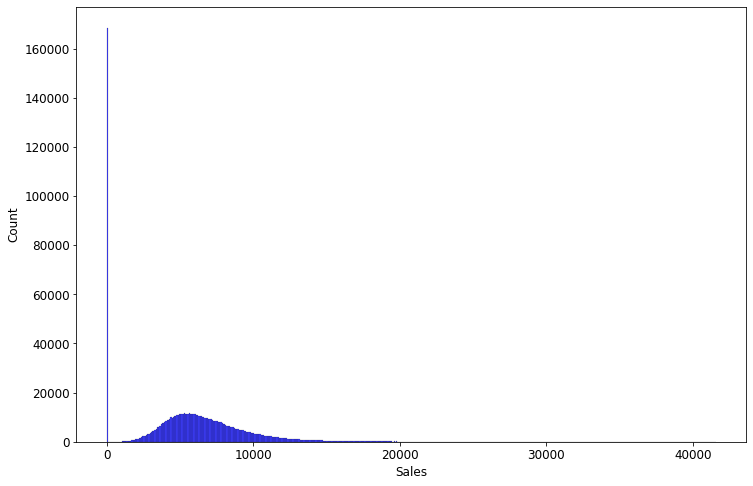

In [ ]:
#Plot the histogram
sns.histplot(Train['Sales'],color='blue')

In [ ]:
# Alot of stuff going on at zero. Let's handle it per store. We can automatically and randomly do that.

In [ ]:
#Look at the whole data first before specific stores
#Train.groupby(['Store'])
random_store = random.choice(range(Train['Store'].nunique())) # Choose a store randomly
ts = Train[Train.Store==random_store]
ts = ts['Sales']

In [ ]:
# Also determine a random store for testing
random_test_store = random.choice(range(Test_val['Store'].nunique()))
test_store_random=Test_val[Test_val.Store==random_test_store]
test_store_random = test_store_random['Sales']

In [ ]:
ts.head()

Date
2013-01-01       0
2013-01-02    3432
2013-01-03    3326
2013-01-04    2905
2013-01-05    1224
Name: Sales, dtype: int64

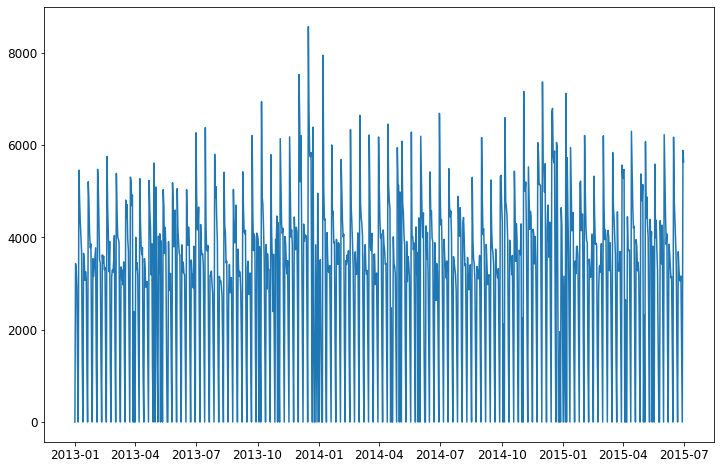

In [ ]:
plt.plot(ts)

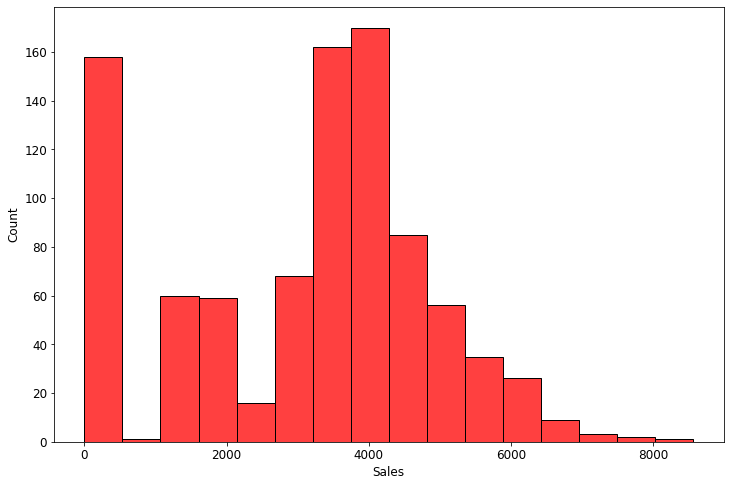

In [ ]:
sns.histplot(ts,color='red')

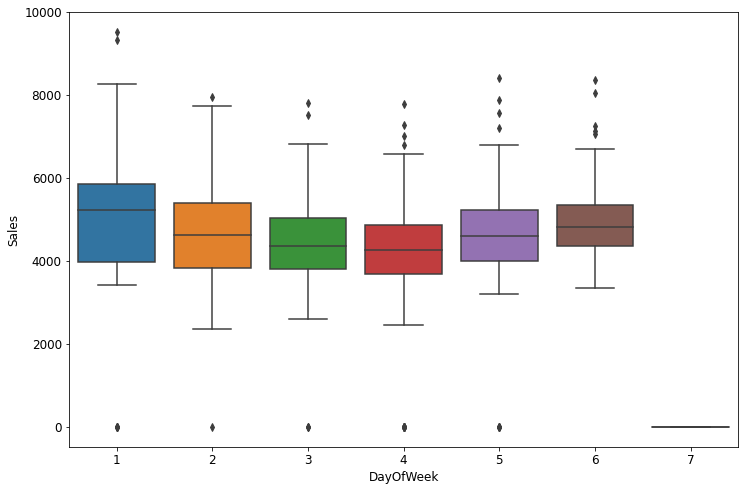

In [ ]:
#Plot the box plot
# Plot first for store ID one 
store_ID1=Train[Train.Store==1]
test_store_ID1=Test_val[Test_val.Store==1]
sns.boxplot(x="DayOfWeek", y="Sales", data=store_ID1)

<b> Here, Monday=1, Sunday=7. </b>

- Here we can find on Sunday stores are closed. Monday has little larger sales, Thurdays has little smaller. There's a few outliers on all days(except Sunday) but it is less on Weekdays(1,3)

[Text(0.5, 1.0, 'Box plot Distribution for the Sales per Week of Store 332')]

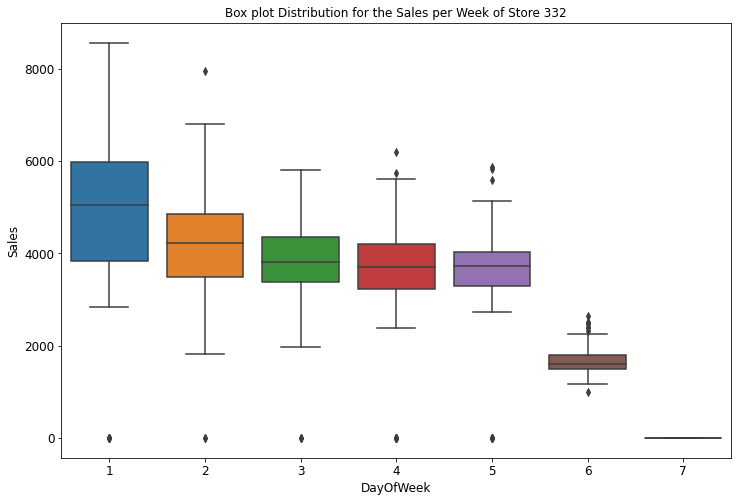

In [ ]:
store_ID_random=Train[Train.Store==random_store]
test_store_ID_random=Test_val[Test_val.Store==random_store]

sns.boxplot(x="DayOfWeek", y="Sales", data=store_ID_random).set(title=f'Box plot Distribution for the Sales per Week of Store {random_store}')

In [ ]:
decomposition =  seasonal_decompose(ts)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

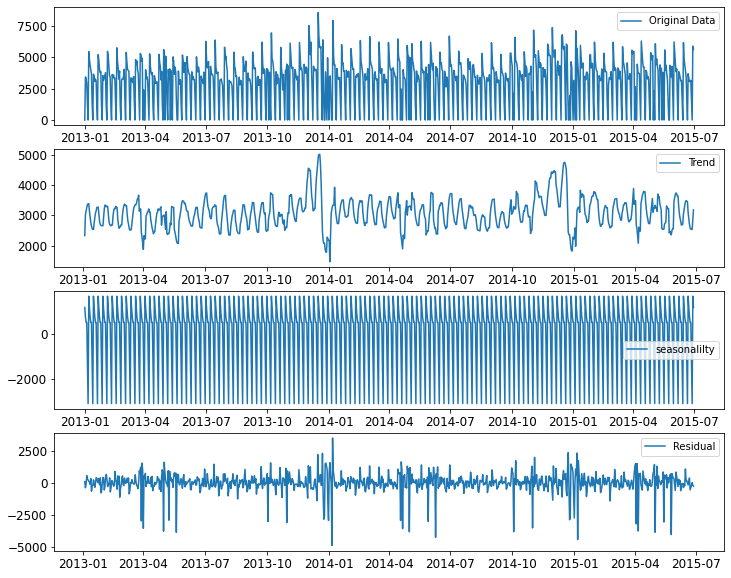

In [ ]:
# Plot 
plt.figure(figsize=(12,10))
plt.subplot(411)
plt.plot(ts, label = 'Original Data')
plt.legend(loc = 'best')


plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')

plt.subplot(413)
plt.plot(seasonal, label = 'seasonalilty')
plt.legend(loc = 'best')
           
plt.subplot(414)
plt.plot(residual, label = 'Residual')
plt.legend(loc = 'best')

In [ ]:
def determine_stationarity(timeseries):
    
    #Obtain rolling statistics
    rolling_mean = timeseries.rolling(12).mean()
    rolling_std = timeseries.rolling(12).std()
    
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='orange',label='Original dataset')
    mean = plt.plot(rolling_mean, color='blue', label='Rolling Mean')
    std = plt.plot(rolling_std, color='green', label = 'Rolling STD')
    
    plt.legend(loc='best')
    plt.title('The Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    #Determine Dickey-Fuller satistics:
    print('--------------------------------------')
    print('Results of Dickey-Fuller Statistics:')
    print('--------------------------------------')
    df_test = adfuller(timeseries, autolag='AIC')
    df_output = pd.Series(df_test[0:4], index=['Test Statistic','p-value','Lags used','Number of Observations'])
    for key,value in df_test[4].items():
        df_output['The Critical Value (%s)'%key] = value
    print(df_output)

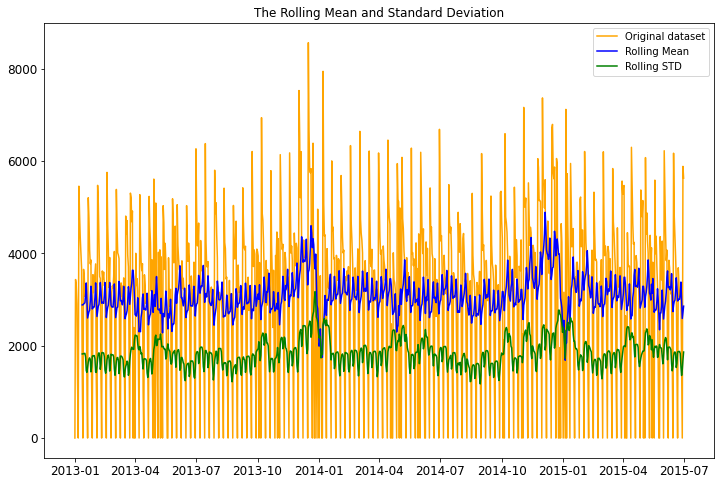

--------------------------------------
Results of Dickey-Fuller Statistics:
--------------------------------------
Test Statistic               -5.376801
p-value                       0.000004
Lags used                    20.000000
Number of Observations      890.000000
The Critical Value (1%)      -3.437719
The Critical Value (5%)      -2.864793
The Critical Value (10%)     -2.568502
dtype: float64


In [ ]:
determine_stationarity(ts)

<b> Inference from the Statistics </b>

- The smaller p-value more likely is a sign that the trend is stationary. Here our p-value is less than 10^-4. Note, since we randomly choose a store, this value can easily change. It's actually good, but as we just visually found a little downward trend, we want to be more strict, i.e. if the p value further decreases, this series would be more likely to be stationary. To get a stationary data, there's many techiniques. We can use log, differencing etc.

In [ ]:
#ts_diff = ts-ts.shift()
#ts_diff = ts_diff-ts.shift()
#plt.plot(ts_diff)

In [ ]:
#plot_acf(ts_diff.dropna())

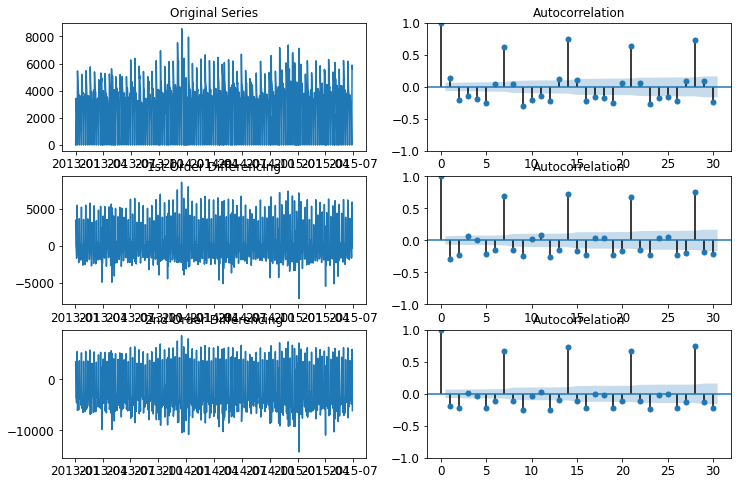

In [ ]:
#plt.rcParams.update({'figure.figsize':(10,12), 'figure.dpi':120})
# Original Series
fig, axes = plt.subplots(3, 2, sharex=False)
axes[0, 0].plot(ts); axes[0, 0].set_title('Original Series')
plot_acf(ts, ax=axes[0, 1])

# 1st Differencing
ts_diff1 = ts-ts.shift()
ts_diff1.dropna(inplace=True)

axes[1, 0].plot(ts_diff1); axes[1, 0].set_title('1st Order Differencing')
plot_acf(ts_diff1, ax=axes[1, 1])

# 2nd Differencing
ts_diff2 = (ts-ts.shift())-ts.shift()
ts_diff2.dropna(inplace=True)
axes[2, 0].plot(ts_diff2); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(ts_diff2, ax=axes[2, 1])

plt.show()

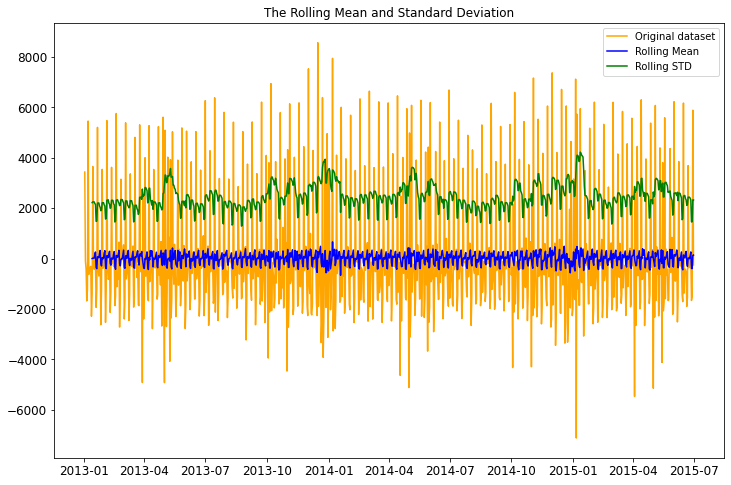

--------------------------------------
Results of Dickey-Fuller Statistics:
--------------------------------------
Test Statistic             -1.291128e+01
p-value                     4.051993e-24
Lags used                   1.900000e+01
Number of Observations      8.900000e+02
The Critical Value (1%)    -3.437719e+00
The Critical Value (5%)    -2.864793e+00
The Critical Value (10%)   -2.568502e+00
dtype: float64


In [ ]:
# Check the statistics of first difference 
determine_stationarity(ts_diff1)

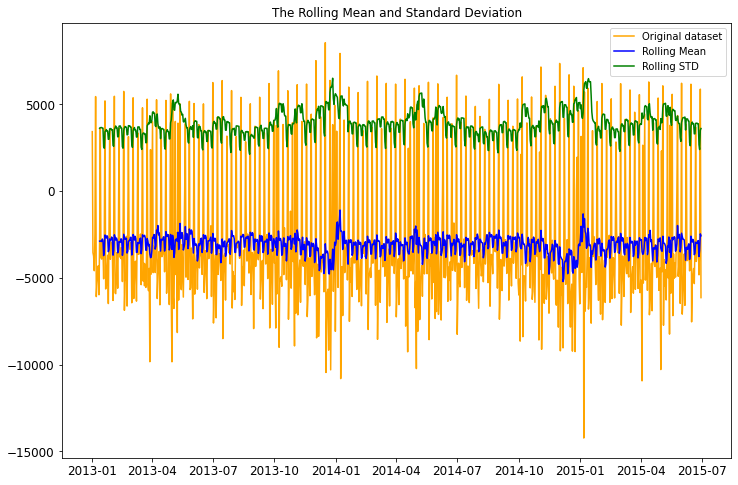

--------------------------------------
Results of Dickey-Fuller Statistics:
--------------------------------------
Test Statistic             -5.861484e+00
p-value                     3.402237e-07
Lags used                   2.100000e+01
Number of Observations      8.880000e+02
The Critical Value (1%)    -3.437735e+00
The Critical Value (5%)    -2.864800e+00
The Critical Value (10%)   -2.568506e+00
dtype: float64


In [ ]:
# Check the statistics of first difference 
determine_stationarity(ts_diff2)

<b> Comment on the Differencing Order </b>

- P-value and the overall statistics seem better in the Order Differencing than in the second order difference

In [ ]:
# Check the Number of differences required for a stationary series
y = ts

## Adf Test
ndiffs(y, test='adf')  # 2

# KPSS test
ndiffs(y, test='kpss')  # 0

# PP test:
ndiffs(y, test='pp')  # 2

0

#### This indicates that we have an overall stationary data without any difference

# Design Various ARIMA Models

### Design the Arima model for RA for the stores

SSE 18190221002.39733  for 332


Text(0.5, 1.0, 'Auto Regression plot for 1st order difference of Store 332')

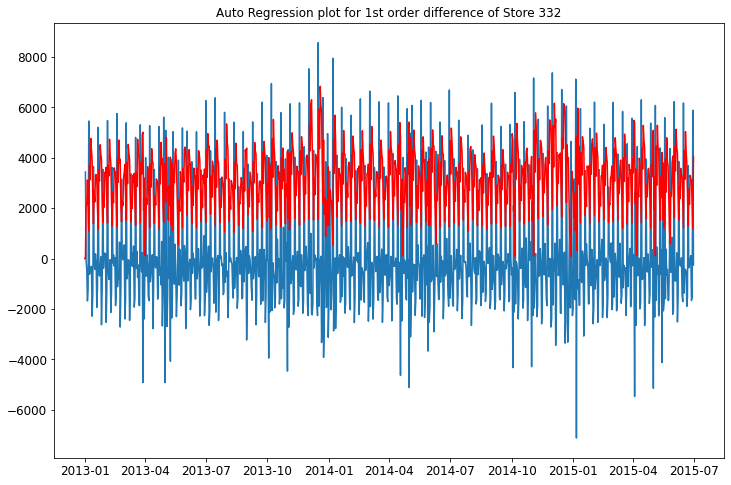

In [ ]:
#Design the Arima model for AR for the stores to make forecasting
#ar_model = sm.tsa.arima.ARIMA(ts, order=(2,1,0))
ar_model = ARIMA(ts, order=(2,1,0))
ar_results =ar_model.fit()
pred = ar_results.forecast() #(steps=31)[0]

plt.plot(ts_diff1)
plt.plot(ar_results.fittedvalues, color = 'red')
#print('MSE',np.sqrt(mean_squared_error(pred,test_store_random)) ,f' for store {random_store}')
#print('MAE',mean_absolute_error(pred,test_store_random), f' for {random_store}')
print('SSE',sum(((ar_results.fittedvalues - ts_diff1).dropna())**2), f' for {random_store}')
plt.title(f'Auto Regression plot for 1st order difference of Store {random_store}')

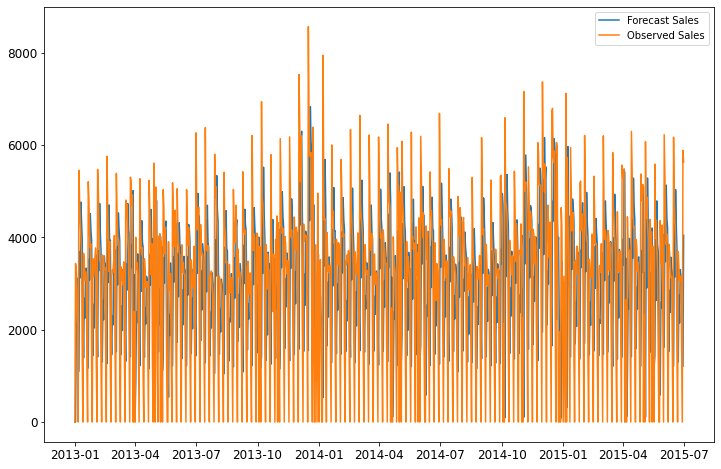

In [ ]:
# Make in-sample prediction
# Make predictions for last 25 values
forecast = ar_results.get_prediction() #(start=-25)
# forecast mean
mean_forecast = forecast.predicted_mean
plt.plot(mean_forecast,label='Forecast Sales')
plt.plot(ts,label='Observed Sales')
plt.legend()
plt.show()

In [ ]:
confidence_intervals = forecast.conf_int()
confidence_intervals

lower Sales  upper Sales
2013-01-01 -5089.588444  5089.588444
2013-01-02 -4517.052914  4517.052914
2013-01-03 -2130.553615  6341.007155
2013-01-04 -2048.781239  6324.228345
2013-01-05 -1073.533893  7299.475691
...                 ...          ...
2015-06-26 -1039.396952  7333.612632
2015-06-27 -1062.946364  7310.063220
2015-06-28 -2056.125253  6316.884331
2015-06-29 -2984.824499  5388.185085
2015-06-30  -140.885553  8232.124030

[911 rows x 2 columns]

Predicted=3619.454605, Expected=7924.000000
Predicted=7089.932088, Expected=7993.000000
Predicted=7153.221279, Expected=8534.000000
Predicted=8292.349184, Expected=5620.000000
Predicted=6600.562635, Expected=0.000000
Predicted=3264.687630, Expected=6591.000000
Predicted=5935.146950, Expected=5127.000000
Predicted=3378.409110, Expected=6794.000000
Predicted=6635.222502, Expected=6109.000000
Predicted=5800.998188, Expected=6700.000000
Predicted=6701.536922, Expected=5789.000000
Predicted=5949.562141, Expected=0.000000
Predicted=2649.215450, Expected=10776.000000
Predicted=8384.691827, Expected=8925.000000
Predicted=5859.500203, Expected=7753.000000
Predicted=8884.946663, Expected=6635.000000
Predicted=7504.183060, Expected=7846.000000
Predicted=7740.788003, Expected=6092.000000
Predicted=6388.256325, Expected=0.000000
Predicted=3106.422482, Expected=6695.000000
Predicted=6079.973473, Expected=5378.000000
Predicted=3560.183167, Expected=4804.000000
Predicted=5504.557342, Expected=6394.000

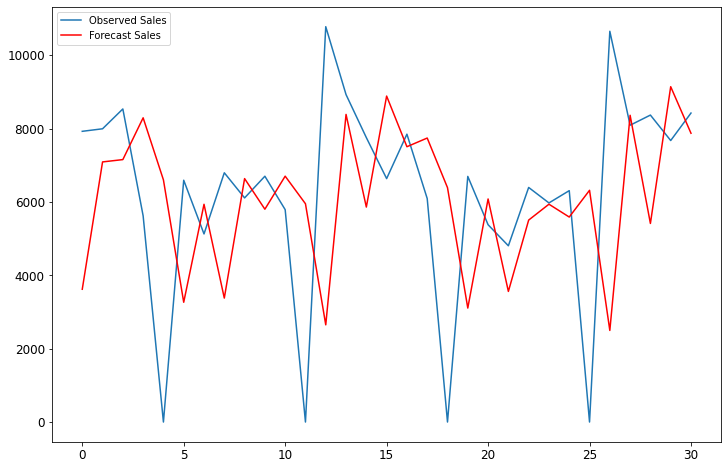

In [ ]:
# Do some predictions 
X_tr = ts.values
X_ts = test_store_random.values

train, test = X_tr, X_ts
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
  model = ARIMA(history, order=(2,1,0))
  model_fit = model.fit()
  output = model_fit.forecast()
  yhat = output[0]
  predictions.append(yhat)
  obs = test[t]
  history.append(obs)
  print('Predicted=%f, Expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = np.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test,label='Observed Sales')
plt.plot(predictions, color='red',label='Forecast Sales')
plt.legend()
plt.show()

In [ ]:
# Out of sample forecast
#diff_forecast = ar_results.get_forecast(steps=20).predicted_mean
mean_forecast = ar_results.get_forecast(steps=20).predicted_mean
from numpy import cumsum
#mean_forecast = cumsum(diff_forecast) #+ ts.iloc[-1,0]
mean_forecast

2015-07-01    3619.454605
2015-07-02    4521.280705
2015-07-03    4876.985777
2015-07-04    4409.908348
2015-07-05    4470.865019
2015-07-06    4613.799901
2015-07-07    4534.234930
2015-07-08    4515.082489
2015-07-09    4551.354048
2015-07-10    4543.582041
2015-07-11    4533.708737
2015-07-12    4540.482210
2015-07-13    4541.289484
2015-07-14    4538.533945
2015-07-15    4539.356725
2015-07-16    4540.013005
2015-07-17    4539.452946
2015-07-18    4539.443620
2015-07-19    4539.648279
2015-07-20    4539.569008
Freq: D, Name: predicted_mean, dtype: float64

In [ ]:
#Make dynamical forecast 
forecast = ar_results.get_prediction(start=-25, dynamic=True)
# forecast mean
mean_forecast = forecast.predicted_mean
# Get confidence intervals of forecasts
confidence_intervals = forecast.conf_int()
#confidence_intervals

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  911
Model:                 ARIMA(2, 1, 0)   Log Likelihood               -8268.283
Date:                Mon, 09 May 2022   AIC                          16542.566
Time:                        00:59:33   BIC                          16557.007
Sample:                    01-01-2013   HQIC                         16548.080
                         - 06-30-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4037      0.040    -10.132      0.000      -0.482      -0.326
ar.L2         -0.3587      0.036    -10.077      0.000      -0.428      -0.289
sigma2      4.563e+06   2.48e+05     18.369      0.0

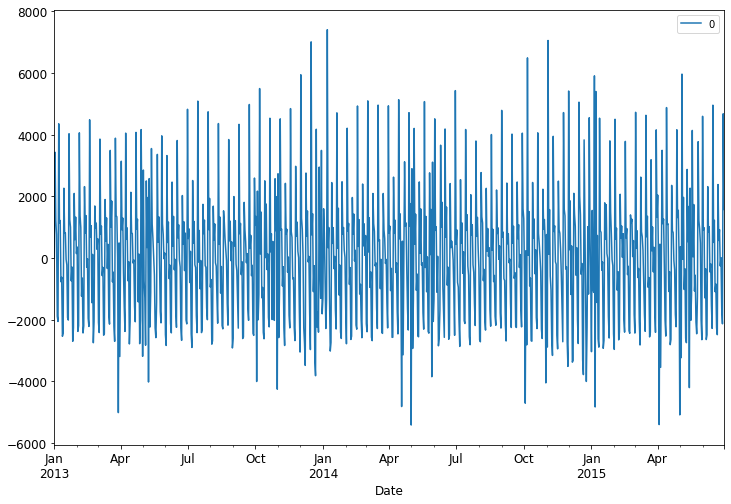

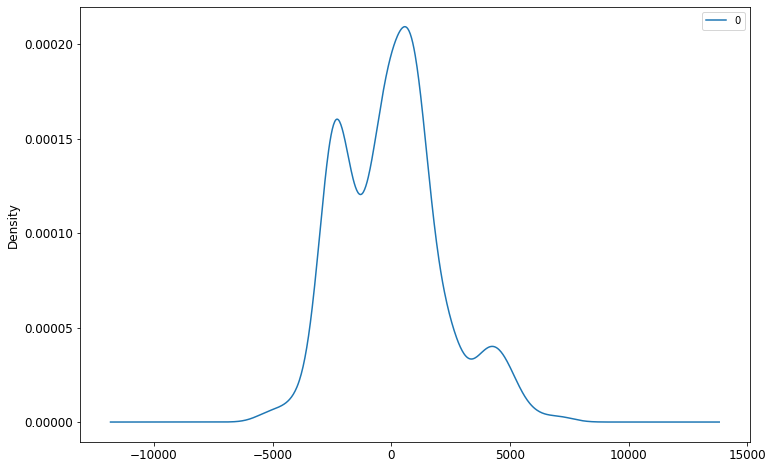

                 0
count   911.000000
mean      8.717656
std    2137.059687
min   -5413.209321
25%   -1845.811594
50%     -13.648987
75%    1114.865407
max    7407.685776


In [ ]:
# Print the AR model summary
# summary of fit model
print(ar_results.summary())
# line plot of residuals
residuals = pd.DataFrame(ar_results.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

In [ ]:
# Plot the prediction of sale
#ok = ar_results.predict(dynamic=False) #  type = 'levels' You can as well choose smaller window (200,500). See below
#plt.plot(ok) 
#plt.plot(ts)

### Design the Arima model for MA for the stores

SSE 13336797379.259977  for 332


Text(0.5, 1.0, 'Auto Regression plot for 1st order difference of Store 332')

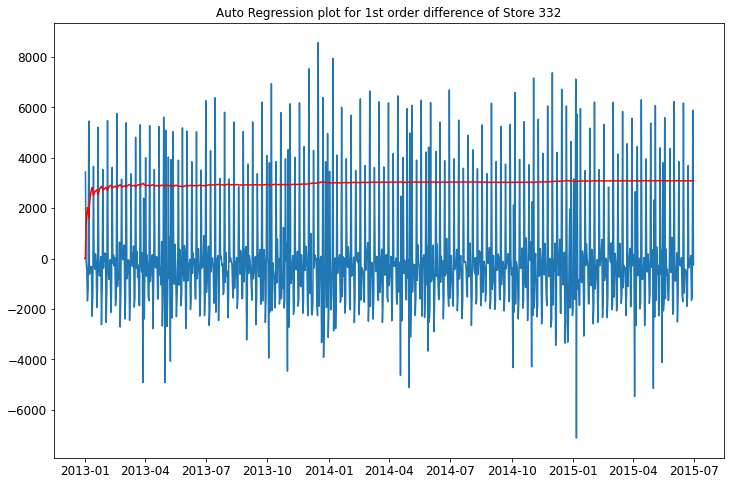

In [ ]:
#Design the Arima model for MA for the stores to make forecasting
ma_model = ARIMA(ts, order=(0,1,1))
ma_results =ma_model.fit()
pred = ma_results.forecast() #(steps=31)[0]

plt.plot(ts_diff1)
plt.plot(ma_results.fittedvalues, color = 'red')
print('SSE',sum(((ma_results.fittedvalues - ts_diff1).dropna())**2), f' for {random_store}')
plt.title(f'Auto Regression plot for 1st order difference of Store {random_store}')

In [ ]:
# Make prediction for AR model
prediction = pd.Series(ma_results.fittedvalues, copy=True)
print(prediction.head())


Date
2013-01-01       0.000000
2013-01-02       0.000000
2013-01-03    1237.006234
2013-01-04    1790.464119
2013-01-05    2023.902136
dtype: float64


In [ ]:
# Plot the cummulative sum
prediction_cum_sum = prediction.cumsum()
print(prediction_cum_sum )

Date
2013-01-01    0.000000e+00
2013-01-02    0.000000e+00
2013-01-03    1.237006e+03
2013-01-04    3.027470e+03
2013-01-05    5.051372e+03
                  ...     
2015-06-26    2.697513e+06
2015-06-27    2.700596e+06
2015-06-28    2.703677e+06
2015-06-29    2.706755e+06
2015-06-30    2.709836e+06
Length: 911, dtype: float64


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  911
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -8134.383
Date:                Mon, 09 May 2022   AIC                          16272.766
Time:                        00:59:34   BIC                          16282.393
Sample:                    01-01-2013   HQIC                         16276.442
                         - 06-30-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0000      0.216     -4.619      0.000      -1.424      -0.576
sigma2      3.434e+06   8.01e+05      4.287      0.000    1.86e+06       5e+06
Ljung-Box (L1) (Q):                  19.72   Jarque-

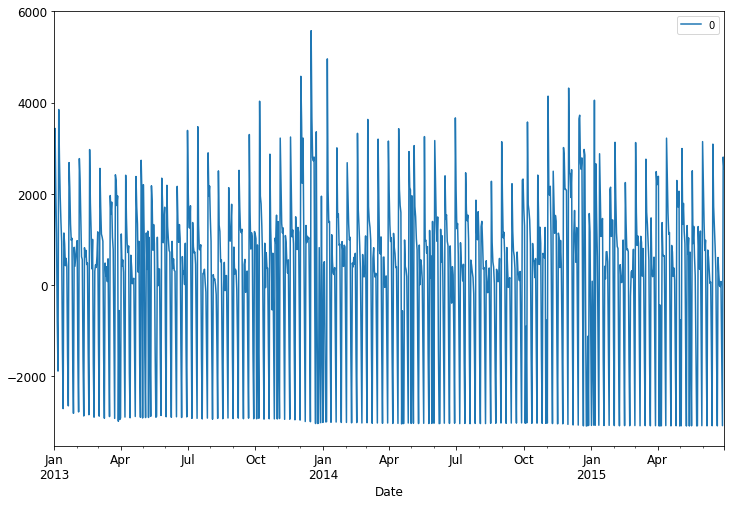

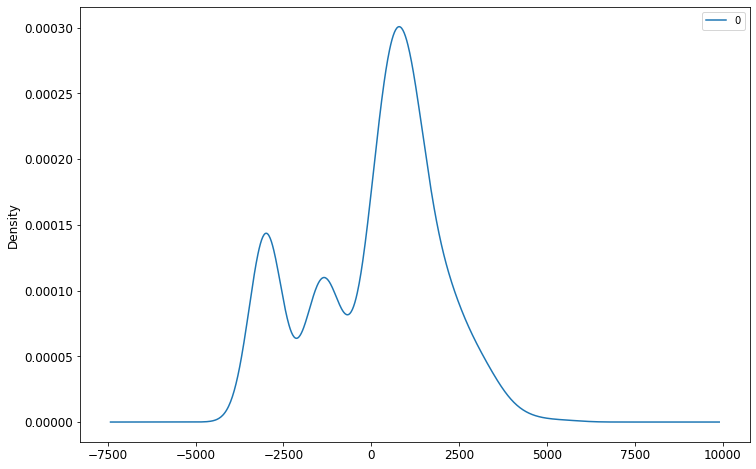

                 0
count   911.000000
mean    111.781598
std    1841.440831
min   -3089.360016
25%   -1356.426418
50%     537.372423
75%    1273.336945
max    5573.610707


In [ ]:
# Print the MA model summary
# summary of fit model
print(ma_results.summary())
# line plot of residuals
residuals = pd.DataFrame(ma_results.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

In [ ]:
# Plot the prediction of sale
#ma_results.plot_predict(dynamic=False) # You can as well choose smaller window (200,500). See below


### Doesn't look good at all. So, the MA does not do well in forecasting the sales

### Design Full Arima model

SSE 14021764568.658316  for 332


Text(0.5, 1.0, 'Auto Regression plot for 1st order difference of Store 332')

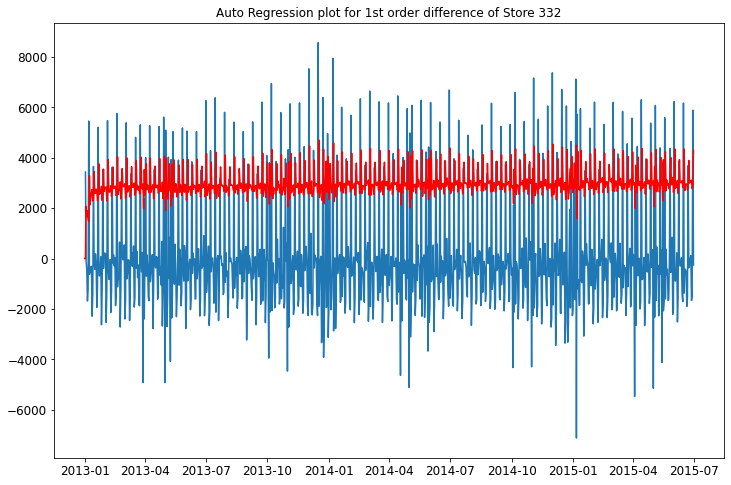

In [ ]:
# Full ARIMA Model
arima_model = ARIMA(ts, order=(2,1,1))
arima_results =arima_model.fit()
pred = ma_results.forecast() #(steps=31)[0]

plt.plot(ts_diff1)
plt.plot(arima_results.fittedvalues, color = 'red')
print('SSE',sum(((arima_results.fittedvalues - ts_diff1).dropna())**2), f' for {random_store}')
plt.title(f'Auto Regression plot for 1st order difference of Store {random_store}')

In [ ]:

# Make prediction for AR model
prediction = pd.Series(arima_results.fittedvalues, copy=True)
print(prediction.head())

Date
2013-01-01       0.000000
2013-01-02       0.000000
2013-01-03    2071.633579
2013-01-04    1663.292201
2013-01-05    1903.728214
dtype: float64


In [ ]:
# Plot the cummulative sum
prediction_cum_sum = prediction.cumsum()
print(prediction_cum_sum )

Date
2013-01-01    0.000000e+00
2013-01-02    0.000000e+00
2013-01-03    2.071634e+03
2013-01-04    3.734926e+03
2013-01-05    5.638654e+03
                  ...     
2015-06-26    2.696871e+06
2015-06-27    2.699977e+06
2015-06-28    2.702754e+06
2015-06-29    2.705631e+06
2015-06-30    2.709919e+06
Length: 911, dtype: float64


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  911
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -8100.440
Date:                Mon, 09 May 2022   AIC                          16208.879
Time:                        00:59:35   BIC                          16228.133
Sample:                    01-01-2013   HQIC                         16216.230
                         - 06-30-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1815      0.033      5.559      0.000       0.118       0.246
ar.L2         -0.2262      0.037     -6.062      0.000      -0.299      -0.153
ma.L1         -1.0000      0.153     -6.520      0.0

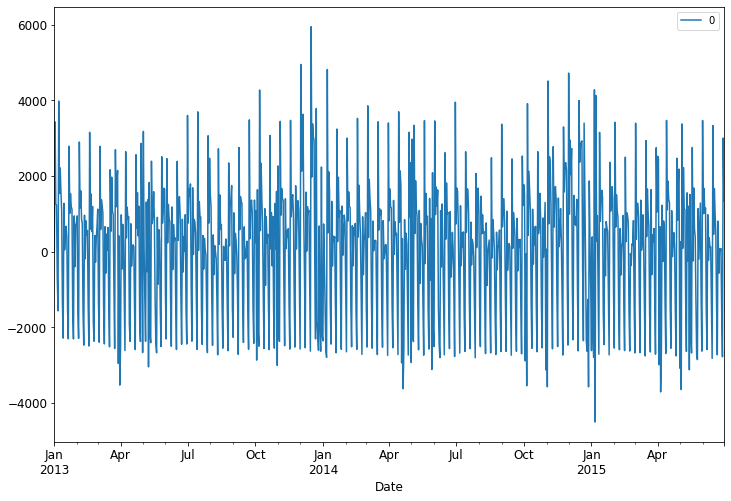

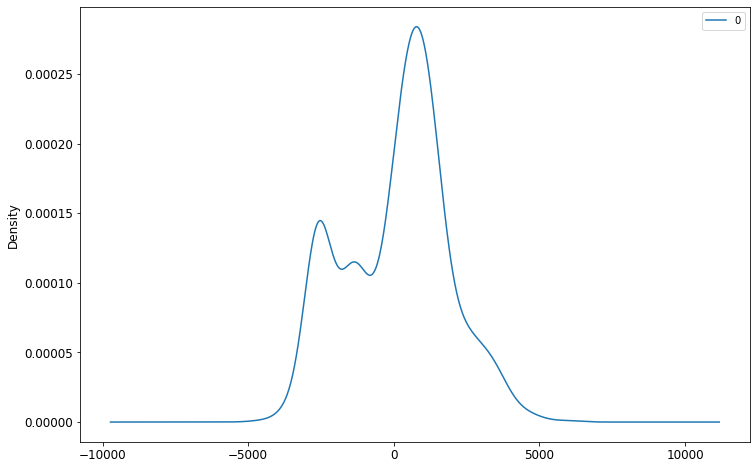

                 0
count   911.000000
mean    111.690656
std    1773.663733
min   -4502.107579
25%   -1368.967789
50%     426.147486
75%    1198.450300
max    5948.666817


In [ ]:
# Print the MA model summary
# summary of fit model
print(arima_results.summary())
# line plot of residuals
residuals = pd.DataFrame(arima_results.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

In [ ]:
# Plot the prediction of sale
#arima_results.plot_predict(dynamic=False) # You can as well choose smaller window (200,500). See below


<b> Summary of the ARIMA Statistics </b>

- The AR model performed better in the overall statistics, showing a better forecast of sales

- From the statistics metrics, the model AIC for the AR is the smallest, which is good. The P Values of the AR1 and MA1 terms have improved and are highly significant (<< 0.05).

- From the residual plots, the AR model has overall absence of patterns with an overall constant mean and variance.

- The residual errors for the AR showed least variation with near zero mean and uniform variance. 

- The plot of the actual sales vs the predicted/forcasted sales show a nice trend with the AR model.

## Hyperparameter and Determination of Best ARIMA parameters 

In [ ]:
df = ts
model_auto_arima = pm.auto_arima(df, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=9, max_q=9, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='trace',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model_auto_arima.summary())


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.26 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=17502.315, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=16660.941, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=16995.642, Time=0.08 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=16622.304, Time=0.03 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=16531.710, Time=0.05 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=16514.658, Time=0.07 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=16502.565, Time=0.09 sec
 ARIMA(6,0,0)(0,0,0)[0]             : AIC=16374.600, Time=0.25 sec
 ARIMA(7,0,0)(0,0,0)[0]             : AIC=inf, Time=0.64 sec
 ARIMA(6,0,1)(0,0,0)[0]             : AIC=16147.150, Time=1.63 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=inf, Time=nan sec
 ARIMA(7,0,1)(0,0,0)[0]             : AIC=15805.921, Time=0.70 sec
 ARIMA(8,0,1)(0,0,0)[0]             : AIC=15789.416, Time=1.23 sec
 ARIMA(8,0,0)(0,0,0)[0]             : 

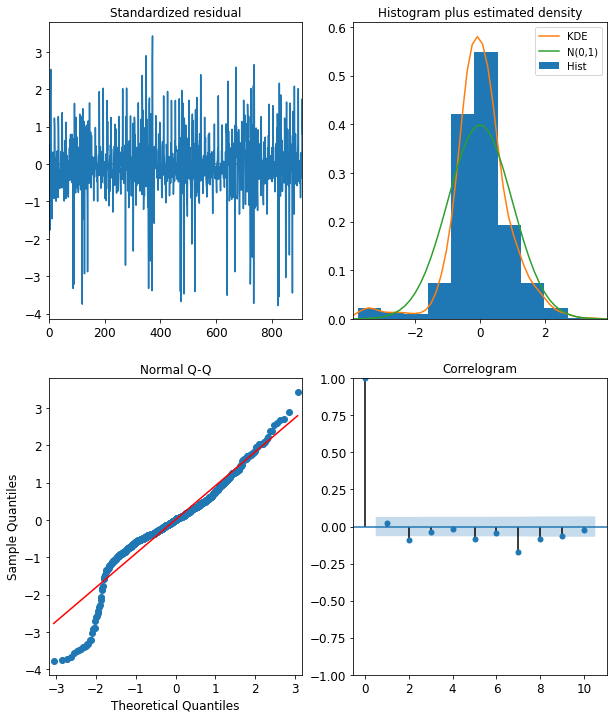

In [ ]:
# Explore interpret the data
model_auto_arima.plot_diagnostics(figsize=(10,12))
plt.show()

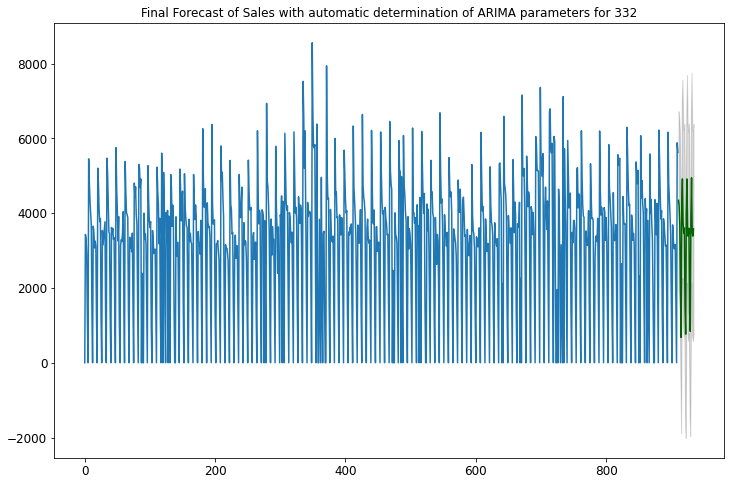

In [ ]:
# Forecast with the best ARIMA model #ARIMA(8,0,5)
n_periods = 24 # Next 24 months
df=ts
fc, confint = model_auto_arima.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(df.values), len(df.values)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.figure(figsize=(12,8))
plt.plot(df.values)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title(f"Final Forecast of Sales with automatic determination of ARIMA parameters for {random_store}")
plt.show()

SSE 12626938536.656477  for 332


Text(0.5, 1.0, 'Auto Regression plot for 1st order difference of Store 332')

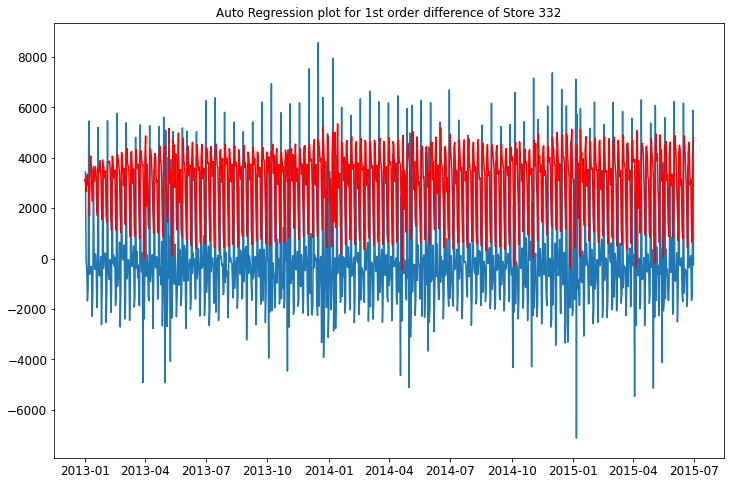

In [ ]:
best_arima = ARIMA(ts, order=(8,0,5))
best_results =best_arima.fit()
pred = best_results.forecast() #(steps=31)[0]

plt.plot(ts_diff1)
plt.plot(best_results.fittedvalues, color = 'red')
print('SSE',sum(((best_results.fittedvalues - ts_diff1).dropna())**2), f' for {random_store}')
plt.title(f'Auto Regression plot for 1st order difference of Store {random_store}')

Predicted=4333.879622, Expected=7924.000000
Predicted=3869.284857, Expected=7993.000000
Predicted=4304.433322, Expected=8534.000000
Predicted=3554.403993, Expected=5620.000000
Predicted=2044.924688, Expected=0.000000
Predicted=5934.950008, Expected=6591.000000
Predicted=4006.498457, Expected=5127.000000
Predicted=5083.461240, Expected=6794.000000
Predicted=4264.842527, Expected=6109.000000
Predicted=3806.251575, Expected=6700.000000
Predicted=2844.468012, Expected=5789.000000
Predicted=529.500989, Expected=0.000000
Predicted=6140.343413, Expected=10776.000000
Predicted=4508.422166, Expected=8925.000000
Predicted=7413.786956, Expected=7753.000000
Predicted=5795.138795, Expected=6635.000000
Predicted=4965.016235, Expected=7846.000000
Predicted=3408.874845, Expected=6092.000000
Predicted=1089.879963, Expected=0.000000
Predicted=6550.331391, Expected=6695.000000
Predicted=4627.446035, Expected=5378.000000
Predicted=5009.795648, Expected=4804.000000
Predicted=3710.011620, Expected=6394.0000

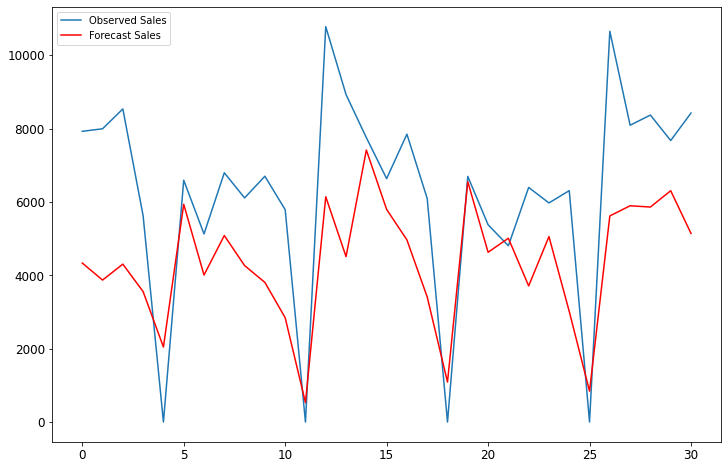

In [ ]:
# Do some predictions 
X_tr = ts.values
X_ts = test_store_random.values

train, test = X_tr, X_ts
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
  model = ARIMA(history, order=(8,0,5))
  model_fit = model.fit()
  output = model_fit.forecast()
  yhat = output[0]
  predictions.append(yhat)
  obs = test[t]
  history.append(obs)
  print('Predicted=%f, Expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = np.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test,label='Observed Sales')
plt.plot(predictions, color='red',label='Forecast Sales')
plt.legend()
plt.show()

In [ ]:
#Make dynamical forecast (-25 means last 25 entries)
forecast = best_results.get_prediction(start=-25, dynamic=True)
# forecast mean
mean_forecast = forecast.predicted_mean
mean_forecast

2015-06-06    1880.347669
2015-06-07     705.174718
2015-06-08    4250.611712
2015-06-09    4680.070150
2015-06-10    4444.712529
2015-06-11    3139.177574
2015-06-12    3479.783597
2015-06-13    1164.319270
2015-06-14     958.166358
2015-06-15    3651.274054
2015-06-16    5028.500402
2015-06-17    4061.104809
2015-06-18    3377.035675
2015-06-19    3305.500782
2015-06-20    1237.922943
2015-06-21     990.412765
2015-06-22    3580.466540
2015-06-23    5091.737950
2015-06-24    3967.535214
2015-06-25    3468.677617
2015-06-26    3217.349215
2015-06-27    1310.294913
2015-06-28     979.855594
2015-06-29    3586.868211
2015-06-30    5067.808269
Freq: D, Name: predicted_mean, dtype: float64

In [ ]:
# Get confidence intervals of forecasts
confidence_intervals = forecast.conf_int()
confidence_intervals

lower Sales  upper Sales
2015-06-06  -423.399968  4184.095305
2015-06-07 -1598.818679  3009.168116
2015-06-08  1879.176327  6622.047097
2015-06-09  2305.718335  7054.421965
2015-06-10  2070.359720  6819.065337
2015-06-11   740.046067  5538.309081
2015-06-12  1060.543682  5899.023512
2015-06-13 -1299.960259  3628.598799
2015-06-14 -1524.721198  3441.053914
2015-06-15  1166.039956  6136.508152
2015-06-16  2536.125088  7520.875716
2015-06-17  1564.339017  6557.870600
2015-06-18   880.098457  5873.972892
2015-06-19   808.540823  5802.460740
2015-06-20 -1263.972534  3739.818421
2015-06-21 -1512.635420  3493.460949
2015-06-22  1076.720634  6084.212445
2015-06-23  2586.141645  7597.334254
2015-06-24  1459.428926  6475.641501
2015-06-25   960.197473  5977.157761
2015-06-26   708.619050  5726.079381
2015-06-27 -1200.128985  3820.718811
2015-06-28 -1530.582861  3490.294049
2015-06-29  1073.572903  6100.163518
2015-06-30  2554.110899  7581.505638

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  911
Model:                 ARIMA(8, 0, 5)   Log Likelihood               -7677.179
Date:                Mon, 09 May 2022   AIC                          15384.359
Time:                        01:03:46   BIC                          15456.577
Sample:                    01-01-2013   HQIC                         15411.930
                         - 06-30-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3086.3545     70.020     44.078      0.000    2949.118    3223.591
ar.L1         -0.0901      0.057     -1.569      0.117      -0.203       0.022
ar.L2         -0.4161      0.041    -10.045      0.0

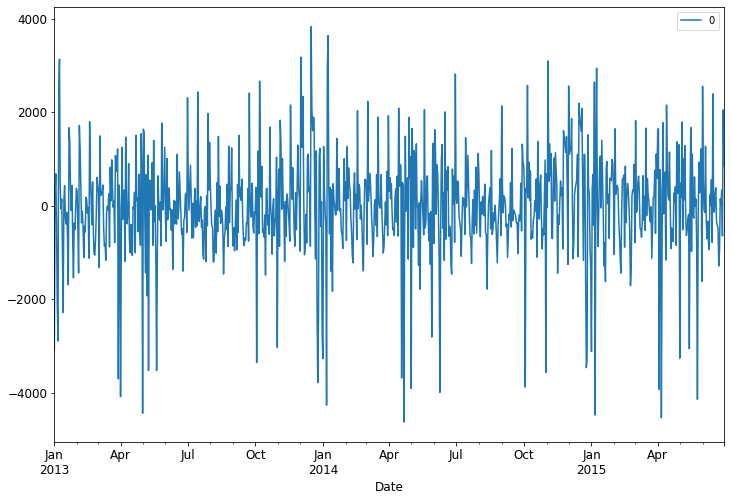

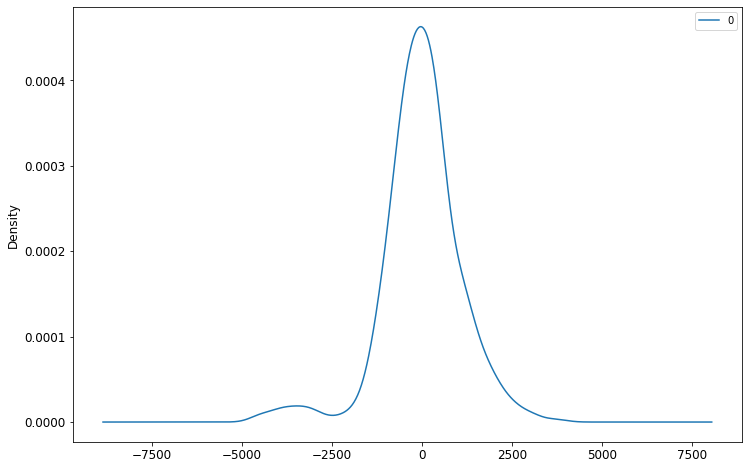

                 0
count   911.000000
mean     -0.231061
std    1103.822989
min   -4631.454417
25%    -528.536784
50%     -14.785097
75%     555.255065
max    3827.435412


In [ ]:
# Print the AR model summary
# summary of fit model
print(best_results.summary())
# line plot of residuals
residuals = pd.DataFrame(best_results.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

<b> As it is obvious, the optimized parameters has a better Gaussian distribution and smaller AIC. </b>

# Project Task Two: Implementing Neural Networks


In [ ]:
# Define general terms for both LSTM and ANN
batch_size = 128
lr = 2e-4
decay = 6e-8
#scaler = MinMaxScaler(feature_range = (0, 1)) # Standardize data

#### LSTM - Long Short-Term Memory Neural Network

In [ ]:
#X_train = train_new.drop(['Sales','Store'],axis=1)
#X_test = test_val_new.drop(['Sales','Store'],axis=1)
#y_train = train_new['Sales']
#y_test = test_val_new['Sales']

X_train = X_train_pca
X_test = X_val_pca
y_train = train_new['Sales']
y_test = test_val_new['Sales']

In [ ]:
# Define model callbacks
lstm_model_callbacks = [keras.callbacks.ModelCheckpoint('LSTM_retail.h5',monitor='val_loss',save_best_only=True,mode='auto',verbose=1,save_freq="epoch"),
                   keras.callbacks.EarlyStopping(monitor='val_loss',patience=25,mode='auto',min_delta=0.0001,restore_best_weights=True)
]

In [ ]:
lstm_model = Sequential()
lstm_model.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1], 1)))
lstm_model.add(LSTM(units = 50, return_sequences = True))
lstm_model.add(LSTM(units = 50, return_sequences = True))
lstm_model.add(LSTM(units = 50))
lstm_model.add(Dense(units = 1))
lstm_model.compile(optimizer = Adam(learning_rate=lr*0.5, decay=decay*0.5), loss = 'mean_squared_error')

In [ ]:
# View model parameters
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 70, 100)           40800     
                                                                 
 lstm_1 (LSTM)               (None, 70, 50)            30200     
                                                                 
 lstm_2 (LSTM)               (None, 70, 50)            20200     
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 111,451
Trainable params: 111,451
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Fit the model
lstm_hist = lstm_model.fit(X_train, y_train, 
                           epochs = 5, 
                           batch_size = batch_size, 
                           callbacks = [lstm_model_callbacks],
                           shuffle=True,
                           steps_per_epoch = X_train.shape[0]//batch_size,
                           validation_data=(X_test, y_test),
                           verbose = 1
                           )

Epoch 1/5
7675/7676 [============================>.] - ETA: 0s - loss: 47740896.0000
Epoch 1: val_loss improved from inf to 50147756.00000, saving model to LSTM_retail.h5
7676/7676 [==============================] - 149s 18ms/step - loss: 47740460.0000 - val_loss: 50147756.0000
Epoch 2/5
7675/7676 [============================>.] - ETA: 0s - loss: 47294144.0000
Epoch 2: val_loss improved from 50147756.00000 to 49673568.00000, saving model to LSTM_retail.h5
7676/7676 [==============================] - 138s 18ms/step - loss: 47293608.0000 - val_loss: 49673568.0000
Epoch 3/5
7675/7676 [============================>.] - ETA: 0s - loss: 46849884.0000
Epoch 3: val_loss improved from 49673568.00000 to 49202428.00000, saving model to LSTM_retail.h5
7676/7676 [==============================] - 138s 18ms/step - loss: 46850048.0000 - val_loss: 49202428.0000
Epoch 4/5
7675/7676 [============================>.] - ETA: 0s - loss: 46408544.0000
Epoch 4: val_loss improved from 49202428.00000 to 487346

In [ ]:
print(lstm_hist.history.keys())

dict_keys(['loss', 'val_loss'])


In [ ]:
hist = pd.DataFrame(lstm_hist.history)
hist['epoch'] = lstm_hist.epoch
hist.tail()

loss    val_loss  epoch
0  47740460.0  50147756.0      0
1  47293608.0  49673568.0      1
2  46850048.0  49202428.0      2
3  46408284.0  48734688.0      3
4  45972976.0  48269944.0      4

Train: 45755676.000, Test: 48269936.000


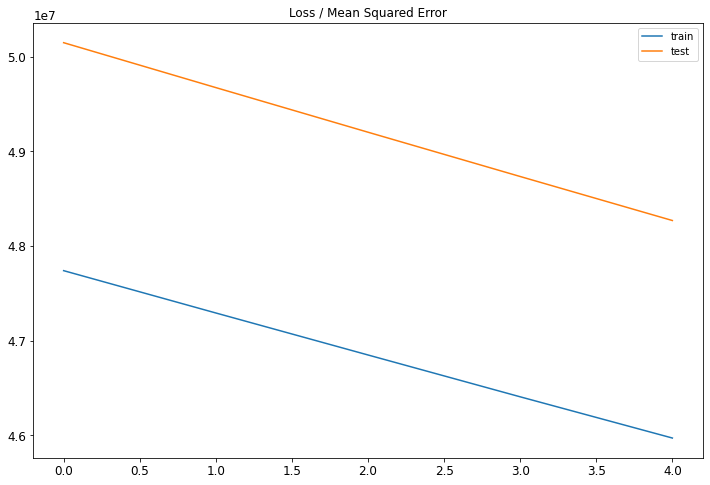

In [ ]:
# evaluate the model
train_mse = lstm_model.evaluate(X_train, y_train, verbose=0)
test_mse = lstm_model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))
# plot loss during training
plt.title('Loss / Mean Squared Error')
plt.plot(lstm_hist.history['loss'], label='train')
plt.plot(lstm_hist.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
# Make prediction
predicted_lstm = lstm_model.predict(X_test)
#predicted_lstm= scaler.inverse_transform(predicted_lstm)
print('===================================================')
print('RMSE', np.sqrt(mean_squared_error(predicted_lstm,y_test)))
print('MAE', mean_absolute_error(predicted_lstm,y_test)) 
print('===================================================')

RMSE 6947.657916218902
MAE 5990.1378938943935


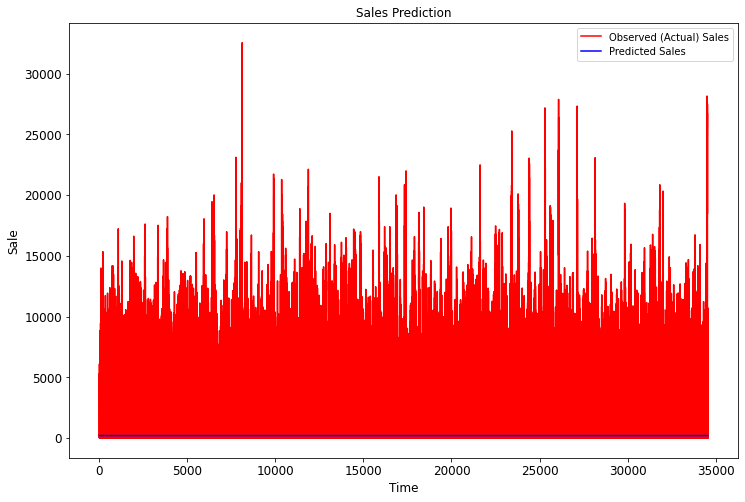

In [ ]:
# Visualising the results
plt.plot(y_test, color = 'red', label = 'Observed (Actual) Sales')
plt.plot(predicted_lstm, color = 'blue', label = 'Predicted Sales')
plt.title('Sales Prediction')
plt.xlabel('Time')
plt.ylabel('Sale')
plt.legend()
plt.show()

#### Designing ANN - CNN


In [ ]:
#X_train = train_new.drop(['Sales','Store'],axis=1)
#X_test = test_val_new.drop(['Sales','Store'],axis=1)
#y_train = train_new['Sales']
#y_test = test_val_new['Sales']

X_train = X_train_pca
X_test = X_val_pca
y_train = train_new['Sales']
y_test = test_val_new['Sales']

In [ ]:
# Here we standardize the target
y_train = pd.DataFrame(y_train)
y_train = scaleData(y_train)

In [ ]:
# Define model callbacks
ann_model_callbacks = [keras.callbacks.ModelCheckpoint('ANN_retail.h5',monitor='val_loss',save_best_only=True,mode='auto',verbose=1,save_freq="epoch"),
                   keras.callbacks.EarlyStopping(monitor='val_loss',patience=25,mode='auto',min_delta=0.0001,restore_best_weights=True)
]

In [ ]:
ann_model = Sequential()
ann_model.add(Dense(100, activation='relu', input_dim = X_train.shape[1]))
ann_model.add(Dropout(0.25))
ann_model.add(Dense(50, activation='relu'))
ann_model.add(Dropout(0.25))
ann_model.add(Dense(50, activation='relu'))
ann_model.add(Dropout(0.25))
ann_model.add(Dense(50, activation='relu'))
ann_model.add(Dropout(0.25))
ann_model.add(Dense(1,activation='linear',kernel_initializer='normal') )

In [ ]:
# Compile
ann_model.compile(optimizer='adam', loss='mean_squared_error')
# View model parameters
ann_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 100)               7100      
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 50)                5050      
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_3 (Dense)             (None, 50)                2550      
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense_4 (Dense)             (None, 50)               

In [ ]:
ann_history = ann_model.fit(X_train,y_train,
                        epochs=5,
                        validation_data=(X_test,y_test),
                        shuffle = True,
                        batch_size = batch_size,
                        steps_per_epoch = X_train.shape[0]//batch_size,
                        callbacks = [ann_model_callbacks],
                        verbose = 1)

Epoch 1/5
7660/7676 [============================>.] - ETA: 0s - loss: 0.0038
Epoch 1: val_loss improved from inf to 50736232.00000, saving model to ANN_retail.h5
7676/7676 [==============================] - 18s 2ms/step - loss: 0.0038 - val_loss: 50736232.0000
Epoch 2/5
7676/7676 [==============================] - ETA: 0s - loss: 0.0035
Epoch 2: val_loss improved from 50736232.00000 to 50736200.00000, saving model to ANN_retail.h5
7676/7676 [==============================] - 17s 2ms/step - loss: 0.0035 - val_loss: 50736200.0000
Epoch 3/5
7675/7676 [============================>.] - ETA: 0s - loss: 0.0033
Epoch 3: val_loss did not improve from 50736200.00000
7676/7676 [==============================] - 17s 2ms/step - loss: 0.0033 - val_loss: 50736276.0000
Epoch 4/5
7654/7676 [============================>.] - ETA: 0s - loss: 0.0032
Epoch 4: val_loss did not improve from 50736200.00000
7676/7676 [==============================] - 17s 2ms/step - loss: 0.0032 - val_loss: 50736276.0000
Epo

In [ ]:
hist = pd.DataFrame(ann_history.history)
hist['epoch'] = ann_history.epoch
hist.tail()

loss    val_loss  epoch
0  0.003837  50736232.0      0
1  0.003492  50736200.0      1
2  0.003333  50736276.0      2
3  0.003217  50736276.0      3
4  0.003137  50736256.0      4

Train: 0.003, Test: 50736224.000


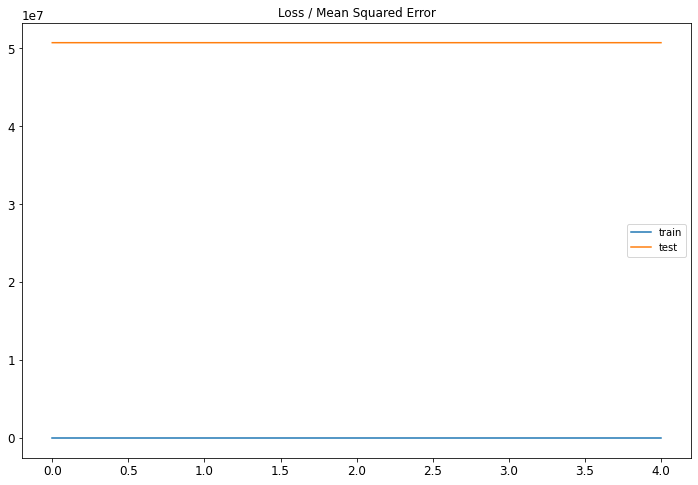

In [ ]:
# evaluate the model
train_mse = ann_model.evaluate(X_train, y_train, verbose=0)
test_mse = ann_model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))
# plot loss during training
plt.title('Loss / Mean Squared Error')
plt.plot(ann_history.history['loss'], label='train')
plt.plot(ann_history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
# Make prediction
predicted_ann = lstm_model.predict(X_test)
print('===================================================')
print('RMSE', np.sqrt(mean_squared_error(predicted_ann,y_test)))
print('MAE', mean_absolute_error(predicted_ann,y_test)) 
print('===================================================')

RMSE 6947.657916218902
MAE 5990.1378938943935


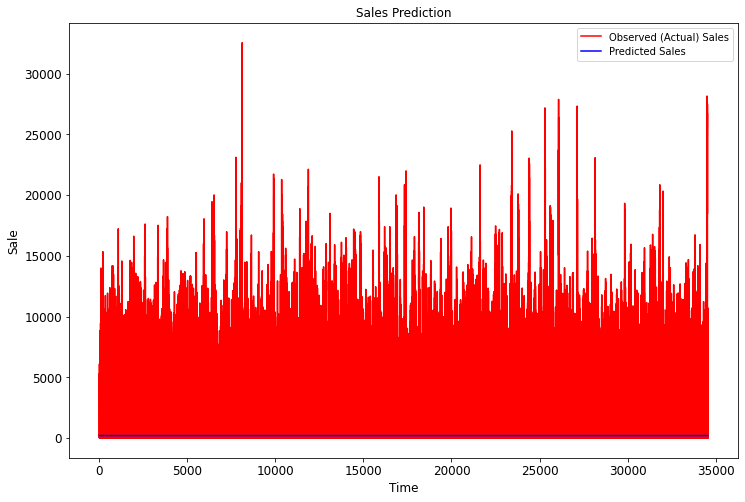

In [ ]:
# Visualising the results
plt.plot(y_test, color = 'red', label = 'Observed (Actual) Sales')
plt.plot(predicted_ann, color = 'blue', label = 'Predicted Sales')
plt.title('Sales Prediction')
plt.xlabel('Time')
plt.ylabel('Sale')
plt.legend()
plt.show()

Hyperparameter Tunning of CNN

In [ ]:
from keras.constraints import maxnorm

In [ ]:
def build_regressor(optimizer= 'adam',init_mode='uniform',activation = 'relu', neurons = 10,dropout_rate=0.0):
  model = keras.Sequential()
  input_dim = X_train.shape[1]
  input_y_size = y_train.shape[1]

  model.add(keras.layers.Dense(neurons,activation=activation, input_dim=input_dim, kernel_initializer = 'uniform' )) # Input + hidden layer
  model.add(keras.layers.Dropout(dropout_rate))
  model.add(keras.layers.Dense(neurons,activation=activation, kernel_initializer = 'uniform')) # hidden layer
  model.add(keras.layers.Dropout(dropout_rate))
  model.add(keras.layers.Dense(neurons,activation=activation)) # hidden layerrelu
  model.add(keras.layers.Dropout(dropout_rate))
  model.add(keras.layers.Dense(input_y_size,activation='linear',kernel_initializer='normal')) #output layer
  #Compile
  model.compile(loss ='mean_absolute_error', optimizer = optimizer,metrics=['mse'])
  return model

In [ ]:
estimator = keras.wrappers.scikit_learn.KerasRegressor(build_fn=build_regressor,verbose=1)

In [ ]:
optimizer = ['RMSprop', 'adam'] # 'SGD','Adagrad', 'Adadelta', 'adam', 'Adamax', 'Nadam']
batch_size = [128]
epochs = [5] # 
#weight_constraint = [1,2,3]
init_mode = ['uniform'] #'zero', 'glorot_normal', 'normal', 'lecun_uniform','glorot_uniform', 'he_normal', 'he_uniform'
activation = ['relu','LeakyRelu'] #'gelu', 'selu','tanh','linear'
neurons = [50, 100]
dropout_rate = [0.2, 0.3]


param_grid = dict(optimizer = optimizer, batch_size = batch_size, 
                  epochs = epochs, init_mode = init_mode,neurons=neurons,dropout_rate=dropout_rate)




#param_grid = {'epochs': [100,200,500],
#              'optimizer': [keras.optimizers.Adam(),keras.optimizers.RMSprop(),keras.optimizers.Adadelta(),
#                           keras.optimizers.Adagrad()],
#              'batch_size': [20,40,50,100,200]
#    
#}

In [ ]:
param_grid

{'batch_size': [128],
 'dropout_rate': [0.2, 0.3],
 'epochs': [5],
 'init_mode': ['uniform'],
 'neurons': [50, 100],
 'optimizer': ['RMSprop', 'adam']}

In [ ]:
#estimator = KerasRegressor(build_fn=baseline_model, nb_epoch=100, batch_size=100, verbose=False)
#kfold = KFold(n_splits=10, random_state=seed)
#results = cross_val_score(estimator, X, y, cv=kfold)
#print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

#estimator.fit(X, y)
#prediction = estimator.predict(X)
#accuracy_score(y, prediction)

In [ ]:
#grid_search = GridSearchCV(estimator=classifier,
#                           param_grid=param_grid,
#                          scoring = 'accuracy', cv=folds, n_jobs = -1)

In [ ]:
#grid_result = grid_search.fit(X_train, y_train) 

In [ ]:
#define the number of folds 
folds = RepeatedKFold(n_splits=10, n_repeats=5,random_state=random_seed)
# define search
gsc_cnn = RandomizedSearchCV(
    estimator,
    param_distributions=param_grid,
    random_state=random_seed,
    cv=folds
)


grid_result = gsc_cnn.fit(X_train, y_train)

Epoch 1/5
6910/6910 [==============================] - 19s 3ms/step - loss: 0.0403 - mse: 0.0039
Epoch 2/5
6910/6910 [==============================] - 18s 3ms/step - loss: 0.0393 - mse: 0.0037
Epoch 3/5
6910/6910 [==============================] - 18s 3ms/step - loss: 0.0389 - mse: 0.0037
Epoch 4/5
6910/6910 [==============================] - 18s 3ms/step - loss: 0.0386 - mse: 0.0036
Epoch 5/5
768/768 [==============================] - 1s 2ms/step - loss: 0.0373 - mse: 0.0036
Epoch 1/5
6910/6910 [==============================] - 19s 3ms/step - loss: 0.0400 - mse: 0.0039
Epoch 2/5
6910/6910 [==============================] - 18s 3ms/step - loss: 0.0391 - mse: 0.0037
Epoch 3/5
6910/6910 [==============================] - 18s 3ms/step - loss: 0.0387 - mse: 0.0037
Epoch 4/5
6910/6910 [==============================] - 18s 3ms/step - loss: 0.0383 - mse: 0.0036
Epoch 5/5
768/768 [==============================] - 1s 2ms/step - loss: 0.0375 - mse: 0.0036
Epoch 1/5
6910/6910 [===============

In [ ]:
print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))

Best: -0.034542 using {'optimizer': 'adam', 'neurons': 100, 'init_mode': 'uniform', 'epochs': 5, 'dropout_rate': 0.2, 'batch_size': 128}


In [ ]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means,stds,params):
    print('%f (%f) with: %r' % (mean,stdev, param))

-0.036597 (0.000898) with: {'optimizer': 'RMSprop', 'neurons': 50, 'init_mode': 'uniform', 'epochs': 5, 'dropout_rate': 0.2, 'batch_size': 128}
-0.035670 (0.000317) with: {'optimizer': 'adam', 'neurons': 50, 'init_mode': 'uniform', 'epochs': 5, 'dropout_rate': 0.2, 'batch_size': 128}
-0.035182 (0.000703) with: {'optimizer': 'RMSprop', 'neurons': 100, 'init_mode': 'uniform', 'epochs': 5, 'dropout_rate': 0.2, 'batch_size': 128}
-0.034542 (0.000294) with: {'optimizer': 'adam', 'neurons': 100, 'init_mode': 'uniform', 'epochs': 5, 'dropout_rate': 0.2, 'batch_size': 128}
-0.037230 (0.000625) with: {'optimizer': 'RMSprop', 'neurons': 50, 'init_mode': 'uniform', 'epochs': 5, 'dropout_rate': 0.3, 'batch_size': 128}
-0.036618 (0.000353) with: {'optimizer': 'adam', 'neurons': 50, 'init_mode': 'uniform', 'epochs': 5, 'dropout_rate': 0.3, 'batch_size': 128}
-0.036394 (0.000814) with: {'optimizer': 'RMSprop', 'neurons': 100, 'init_mode': 'uniform', 'epochs': 5, 'dropout_rate': 0.3, 'batch_size': 128

In [ ]:
print(f'Total time for the case study is: {time.time()-timetotal}')

Total time for the case study is: 71430.05310463905


# End Case Study